# *   CS-20065 (Anas Hassan Ansari)
# *   CS-20090 (Farrukh Ahmed Siddiqui)
# *   CS-20119 (Syed Muhammad Hamza Naveed)

To avoid warnings, please download the version 1.2.2 of scikit-learn
version 2.0.1+cu117 for pytorch

For interface, please run cells from markdown "INTERFACE" which will load the previous models

## Imports

In [404]:
import pandas as pd
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import metrics
import joblib

import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler, ConcatDataset
import torch.nn as nn
from torch.optim import Adam
from torch.autograd import Variable
import torch.nn.functional as F
from sklearn.model_selection import KFold
from torcheval.metrics import BinaryAccuracy, BinaryConfusionMatrix, BinaryPrecision, BinaryRecall, BinaryF1Score
from sklearn.metrics import roc_curve, auc

## Setting up Dataset

In [22]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [23]:
meta = unpickle('cifar-10-batches-py/batches.meta')
data1 = unpickle('cifar-10-batches-py/data_batch_1')
data2 = unpickle('cifar-10-batches-py/data_batch_2')
data3 = unpickle('cifar-10-batches-py/data_batch_3')
data4 = unpickle('cifar-10-batches-py/data_batch_4')
data5 = unpickle('cifar-10-batches-py/data_batch_5')
test = unpickle('cifar-10-batches-py/test_batch')

In [24]:
meta

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

In [25]:
data1

{b'batch_label': b'training batch 1 of 5',
 b'labels': [6,
  9,
  9,
  4,
  1,
  1,
  2,
  7,
  8,
  3,
  4,
  7,
  7,
  2,
  9,
  9,
  9,
  3,
  2,
  6,
  4,
  3,
  6,
  6,
  2,
  6,
  3,
  5,
  4,
  0,
  0,
  9,
  1,
  3,
  4,
  0,
  3,
  7,
  3,
  3,
  5,
  2,
  2,
  7,
  1,
  1,
  1,
  2,
  2,
  0,
  9,
  5,
  7,
  9,
  2,
  2,
  5,
  2,
  4,
  3,
  1,
  1,
  8,
  2,
  1,
  1,
  4,
  9,
  7,
  8,
  5,
  9,
  6,
  7,
  3,
  1,
  9,
  0,
  3,
  1,
  3,
  5,
  4,
  5,
  7,
  7,
  4,
  7,
  9,
  4,
  2,
  3,
  8,
  0,
  1,
  6,
  1,
  1,
  4,
  1,
  8,
  3,
  9,
  6,
  6,
  1,
  8,
  5,
  2,
  9,
  9,
  8,
  1,
  7,
  7,
  0,
  0,
  6,
  9,
  1,
  2,
  2,
  9,
  2,
  6,
  6,
  1,
  9,
  5,
  0,
  4,
  7,
  6,
  7,
  1,
  8,
  1,
  1,
  2,
  8,
  1,
  3,
  3,
  6,
  2,
  4,
  9,
  9,
  5,
  4,
  3,
  6,
  7,
  4,
  6,
  8,
  5,
  5,
  4,
  3,
  1,
  8,
  4,
  7,
  6,
  0,
  9,
  5,
  1,
  3,
  8,
  2,
  7,
  5,
  3,
  4,
  1,
  5,
  7,
  0,
  4,
  7,
  5,
  5,
  1,
  0,
  9,
  6,
  9,
 

In [26]:
test

{b'batch_label': b'testing batch 1 of 1',
 b'labels': [3,
  8,
  8,
  0,
  6,
  6,
  1,
  6,
  3,
  1,
  0,
  9,
  5,
  7,
  9,
  8,
  5,
  7,
  8,
  6,
  7,
  0,
  4,
  9,
  5,
  2,
  4,
  0,
  9,
  6,
  6,
  5,
  4,
  5,
  9,
  2,
  4,
  1,
  9,
  5,
  4,
  6,
  5,
  6,
  0,
  9,
  3,
  9,
  7,
  6,
  9,
  8,
  0,
  3,
  8,
  8,
  7,
  7,
  4,
  6,
  7,
  3,
  6,
  3,
  6,
  2,
  1,
  2,
  3,
  7,
  2,
  6,
  8,
  8,
  0,
  2,
  9,
  3,
  3,
  8,
  8,
  1,
  1,
  7,
  2,
  5,
  2,
  7,
  8,
  9,
  0,
  3,
  8,
  6,
  4,
  6,
  6,
  0,
  0,
  7,
  4,
  5,
  6,
  3,
  1,
  1,
  3,
  6,
  8,
  7,
  4,
  0,
  6,
  2,
  1,
  3,
  0,
  4,
  2,
  7,
  8,
  3,
  1,
  2,
  8,
  0,
  8,
  3,
  5,
  2,
  4,
  1,
  8,
  9,
  1,
  2,
  9,
  7,
  2,
  9,
  6,
  5,
  6,
  3,
  8,
  7,
  6,
  2,
  5,
  2,
  8,
  9,
  6,
  0,
  0,
  5,
  2,
  9,
  5,
  4,
  2,
  1,
  6,
  6,
  8,
  4,
  8,
  4,
  5,
  0,
  9,
  9,
  9,
  8,
  9,
  9,
  3,
  7,
  5,
  0,
  0,
  5,
  2,
  2,
  3,
  8,
  6,
  3,
  4,
  

In [27]:
label1 = np.array([str(meta[b'label_names'][x]).strip('b\'') for x in data1[b'labels']])

label2 = np.array([str(meta[b'label_names'][x]).strip('b\'') for x in data2[b'labels']])

label3 = np.array([str(meta[b'label_names'][x]).strip('b\'') for x in data3[b'labels']])

label4 = np.array([str(meta[b'label_names'][x]).strip('b\'') for x in data4[b'labels']])

label5 = np.array([str(meta[b'label_names'][x]).strip('b\'') for x in data5[b'labels']])

y_train = np.concatenate([label1, label2, label3, label4, label5])

y_test = np.array([str(meta[b'label_names'][x]).strip('b\'') for x in test[b'labels']])


print(y_train.shape)
print(y_test.shape)

(50000,)
(10000,)


In [28]:
animals = ['ird', 'cat', 'deer', 'dog', 'frog', 'horse'] # 0 label
vehicles = ['airplane', 'automobile', 'ship', 'truck'] # 1 label

for i in range(len(y_train)):
    if y_train[i] in animals: y_train[i]=0
    if y_train[i] in vehicles: y_train[i]=1

for i in range(len(y_test)):
    if y_test[i] in animals: y_test[i]=0
    if y_test[i] in vehicles: y_test[i]=1


In [29]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [30]:
print(y_train.shape)
np.unique(y_train, return_counts=True)

(50000,)


(array([0, 1]), array([30000, 20000], dtype=int64))

In [31]:
print(y_test.shape)
np.unique(y_test, return_counts=True)

(10000,)


(array([0, 1]), array([6000, 4000], dtype=int64))

In [32]:
x_train = np.concatenate([data1[b'data'], data2[b'data'], data3[b'data'], data4[b'data'], data5[b'data']])
x_test = test[b'data']

In [33]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


## Display an Image from training set

In [34]:
def image_array_from_data(image_data):
    l1, l2 = [], []
    for i in range(1024):
        l1.append((image_data[i],image_data[i+1024],image_data[i+2048]))
        if (i+1)%32==0:
            l2.append(l1)
            l1=[]
    array = np.array(l2, dtype=np.uint8)
    return array

(-0.5, 31.5, 31.5, -0.5)

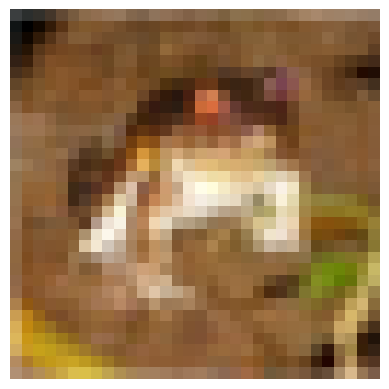

In [35]:
img = Image.fromarray(image_array_from_data(x_train[0]))
plt.imshow(img)
plt.axis("off")

## Splitting into train, validation and test sets and Normalizing them

In [36]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [37]:
x_train_normalized = x_train / 255
x_val_normalized = x_val / 255
x_test_normalized = x_test / 255

## Defining Functions to display Metrics


In [38]:
# function to print accuracy, precision, Recall, F1 scores and Confusion matrix
# on the basis of original and predicted output
def display_metrics(y, y_pred):
    acc = metrics.accuracy_score(y, y_pred)
    prec = metrics.precision_score(y, y_pred, average="binary")
    recall = metrics.recall_score(y, y_pred, average="binary")
    f1 = metrics.f1_score(y, y_pred, average="binary")
    cm = metrics.confusion_matrix(y, y_pred)
    print("The accuracy is "+str(acc*100)+"%", end="\n\n")
    print('Precision:', prec, end="\n\n")
    print('Recall score:', recall, end="\n\n")
    print('F1 score:',f1, end="\n\n")
    print("Confusion matrix is:\n" + str(cm), end="\n\n")
    return [acc, prec, recall, f1, cm]

In [39]:
# function to visualize confusion matrix
# on the basis of original and predicted output
def visualize_confusion_matrix(y, y_pred, title=""):
    plt.figure(figsize=(4, 4))
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
    plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

In [40]:
#visualize ROC curve
def visulaize_roc_curve(y, y_pred, y_pred_prob):
    fpr, tpr, thresholds = metrics.roc_curve(y, y_pred_prob)
    auc = metrics.roc_auc_score(y, y_pred)

    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (AUC = {:.2f})'.format(auc))
    plt.show()

## Parametric Shallow Algorithm
Logistics Regression

### Model #01

In [41]:
%%time

model1_1 = LogisticRegression(solver='liblinear', max_iter=1000, random_state=0)

model1_1.fit(x_train_normalized, y_train)

CPU times: total: 3min 43s
Wall time: 3min 43s


LogisticRegression(max_iter=1000, random_state=0, solver='liblinear')

In [42]:
#accuracy scores on train, validation and test sets
print("Train Set Score:", model1_1.score(x_train_normalized, y_train), "\n",
      "Validation Set Score:", model1_1.score(x_val_normalized, y_val), "\n",
      "Test Set Score:", model1_1.score(x_test_normalized, y_test), "\n" )

Train Set Score: 0.840275 
 Validation Set Score: 0.8128 
 Test Set Score: 0.8118 



In [43]:
# predictions

#predicting values and probabilities on training set
y_train_pred_1_1 = model1_1.predict(x_train_normalized)
y_train_predProb_1_1 = model1_1.predict_proba(x_train_normalized)[:, 1]

#predicting values and probabilities on validation set
y_val_pred_1_1 = model1_1.predict(x_val_normalized)
y_val_predProb_1_1 = model1_1.predict_proba(x_val_normalized)[:, 1]

In [44]:
#saving the model
joblib.dump(model1_1, "Saved Models/model1_1.sav")

['Saved Models/model1_1.sav']

#### Metrics

Training Metrics

In [45]:
metrics_1_1_train = display_metrics(y_train, y_train_pred_1_1)

The accuracy is 84.0275%

Precision: 0.820285409442518

Recall score: 0.7690528290090654

F1 score: 0.7938433738827401

Confusion matrix is:
[[21310  2695]
 [ 3694 12301]]



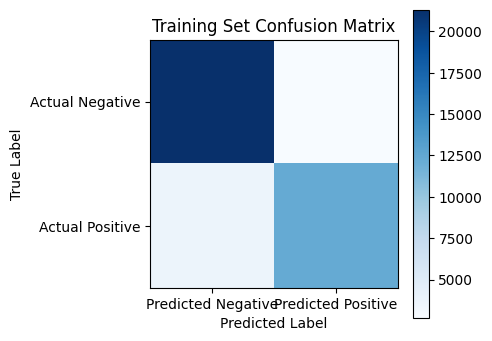

In [46]:
visualize_confusion_matrix(y_train, y_train_pred_1_1, title="Training Set Confusion Matrix")

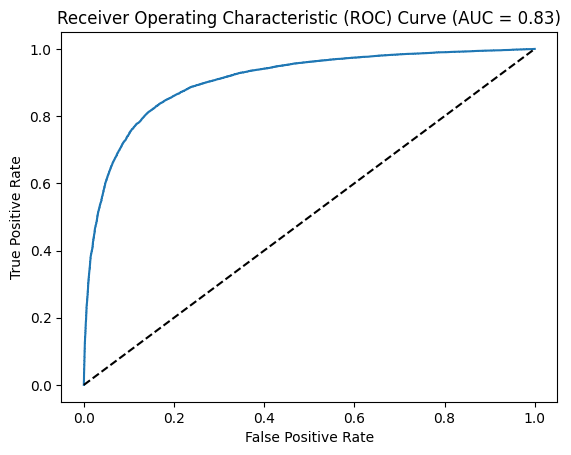

In [47]:
visulaize_roc_curve(y_train, y_train_pred_1_1, y_train_predProb_1_1)

Validation Set

In [48]:
metrics_1_1_val = display_metrics(y_val, y_val_pred_1_1)

The accuracy is 81.28%

Precision: 0.7856951513527993

Recall score: 0.732334581772784

F1 score: 0.7580770224864306

Confusion matrix is:
[[5195  800]
 [1072 2933]]



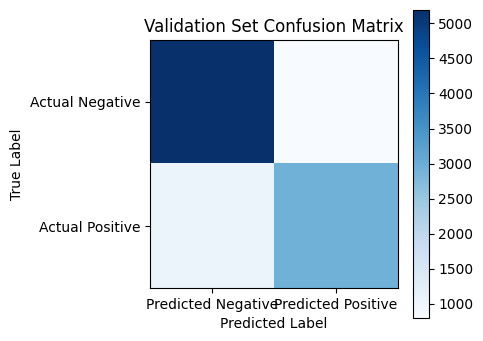

In [49]:
visualize_confusion_matrix(y_val, y_val_pred_1_1, title="Validation Set Confusion Matrix")

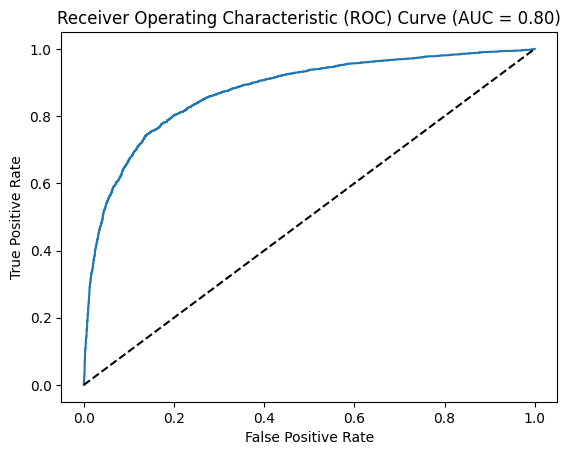

In [50]:
visulaize_roc_curve(y_val, y_val_pred_1_1, y_val_predProb_1_1)

### Model #02

In [51]:
%%time

model1_2 = LogisticRegression(solver='lbfgs', max_iter=5000, random_state=0)

model1_2.fit(x_train_normalized, y_train)

CPU times: total: 26min
Wall time: 3min 54s


LogisticRegression(max_iter=5000, random_state=0)

In [52]:
#accuracy scores on train, validation and test sets
print("Train Set Score:", model1_2.score(x_train_normalized, y_train), "\n",
      "Validation Set Score:", model1_2.score(x_val_normalized, y_val), "\n",
      "Test Set Score:", model1_2.score(x_test_normalized, y_test), "\n" )

Train Set Score: 0.840375 
 Validation Set Score: 0.8129 
 Test Set Score: 0.8119 



In [53]:
# predictions

#predicting values and probabilities on training set
y_train_pred_1_2 = model1_2.predict(x_train_normalized)
y_train_predProb_1_2 = model1_2.predict_proba(x_train_normalized)[:, 1]

#predicting values and probabilities on validation set
y_val_pred_1_2 = model1_2.predict(x_val_normalized)
y_val_predProb_1_2 = model1_2.predict_proba(x_val_normalized)[:, 1]

In [54]:
#saving the model
joblib.dump(model1_2, "Saved Models/model1_2.sav")

['Saved Models/model1_2.sav']

#### Metrics

Training Metrics

In [55]:
metrics_1_2_train = display_metrics(y_train, y_train_pred_1_2)

The accuracy is 84.0375%

Precision: 0.8205042689434365

Recall score: 0.7690528290090654

F1 score: 0.7939458482589473

Confusion matrix is:
[[21314  2691]
 [ 3694 12301]]



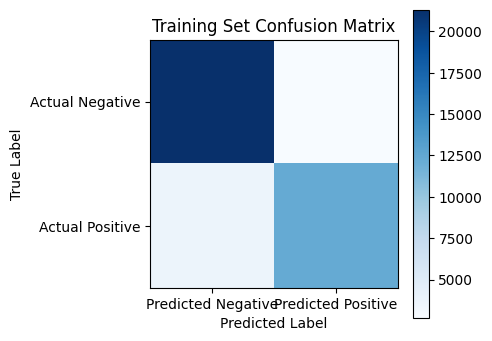

In [56]:
visualize_confusion_matrix(y_train, y_train_pred_1_2, title="Training Set Confusion Matrix")

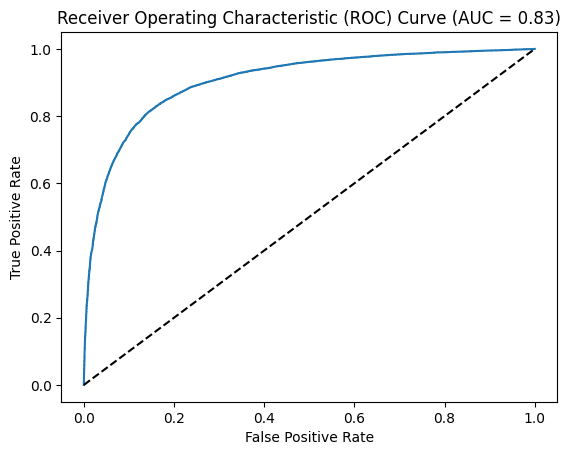

In [57]:
visulaize_roc_curve(y_train, y_train_pred_1_2, y_train_predProb_1_2)

Validation Metrics

In [58]:
metrics_1_2_val = display_metrics(y_val, y_val_pred_1_2)

The accuracy is 81.28999999999999%

Precision: 0.7857525441885378

Recall score: 0.7325842696629213

F1 score: 0.7582374983848041

Confusion matrix is:
[[5195  800]
 [1071 2934]]



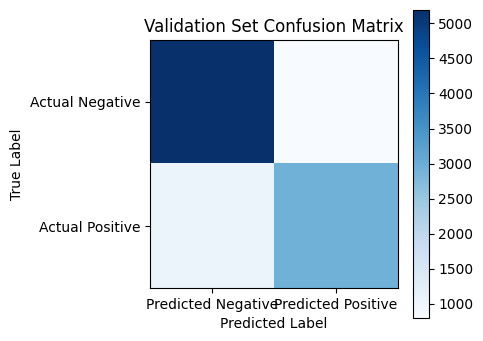

In [59]:
visualize_confusion_matrix(y_val, y_val_pred_1_2, title="Validation Set Confusion Matrix")

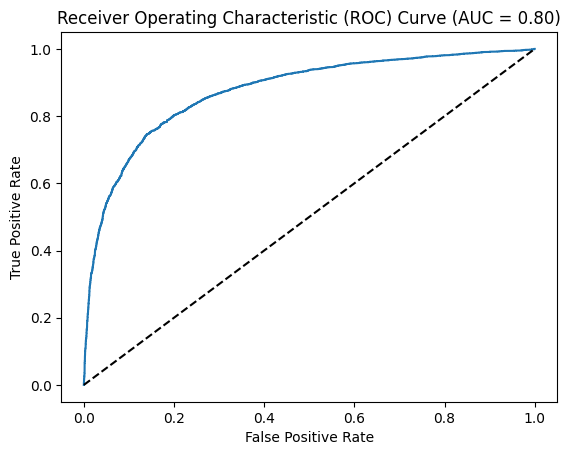

In [60]:
visulaize_roc_curve(y_val, y_val_pred_1_2, y_val_predProb_1_2)

### Model #03

In [61]:
%%time

model1_3 = LogisticRegression(max_iter=5000, random_state=0, solver='sag')

model1_3.fit(x_train_normalized, y_train)

CPU times: total: 19min 15s
Wall time: 19min 17s


LogisticRegression(max_iter=5000, random_state=0, solver='sag')

In [62]:
#accuracy scores on train, validation and test sets
print("Train Set Score:", model1_3.score(x_train_normalized, y_train), "\n",
      "Validation Set Score:", model1_3.score(x_val_normalized, y_val), "\n",
      "Test Set Score:", model1_3.score(x_test_normalized, y_test), "\n" )

Train Set Score: 0.84035 
 Validation Set Score: 0.8126 
 Test Set Score: 0.812 



In [63]:
# predictions

#predicting values and probabilities on training set
y_train_pred_1_3 = model1_3.predict(x_train_normalized)
y_train_predProb_1_3 = model1_3.predict_proba(x_train_normalized)[:, 1]

#predicting values and probabilities on validation set
y_val_pred_1_3 = model1_3.predict(x_val_normalized)
y_val_predProb_1_3 = model1_3.predict_proba(x_val_normalized)[:, 1]

In [64]:
#saving the model
joblib.dump(model1_3, "Saved Models/model1_3.sav")

['Saved Models/model1_3.sav']

#### Metrics

Training Metrics

In [65]:
metrics_1_3_train = display_metrics(y_train, y_train_pred_1_3)

The accuracy is 84.03500000000001%

Precision: 0.8203640728145629

Recall score: 0.7691778680837762

F1 score: 0.7939468249870935

Confusion matrix is:
[[21311  2694]
 [ 3692 12303]]



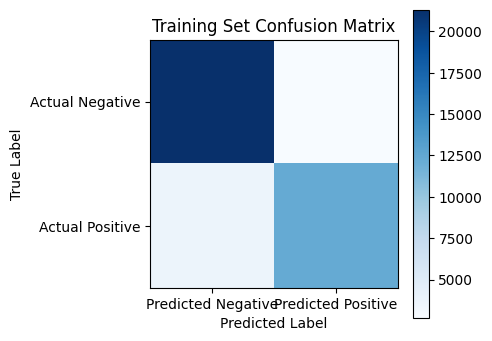

In [66]:
visualize_confusion_matrix(y_train, y_train_pred_1_3, title="Training Set Confusion Matrix")

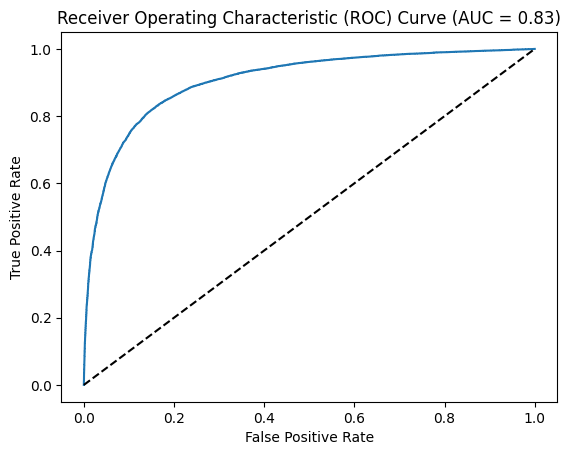

In [67]:
visulaize_roc_curve(y_train, y_train_pred_1_3, y_train_predProb_1_3)

Validation Metrics

In [68]:
metrics_1_3_val = display_metrics(y_val, y_val_pred_1_3)

The accuracy is 81.26%

Precision: 0.7854272702919903

Recall score: 0.7320848938826466

F1 score: 0.7578185577668647

Confusion matrix is:
[[5194  801]
 [1073 2932]]



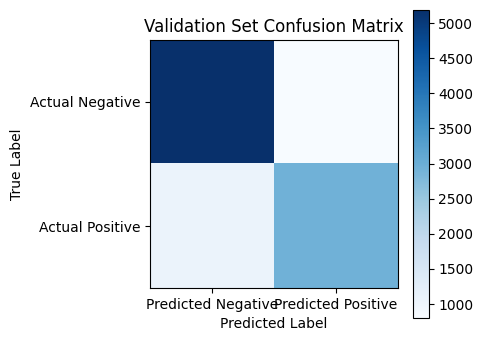

In [69]:
visualize_confusion_matrix(y_val, y_val_pred_1_3, title="Validation Set Confusion Matrix")

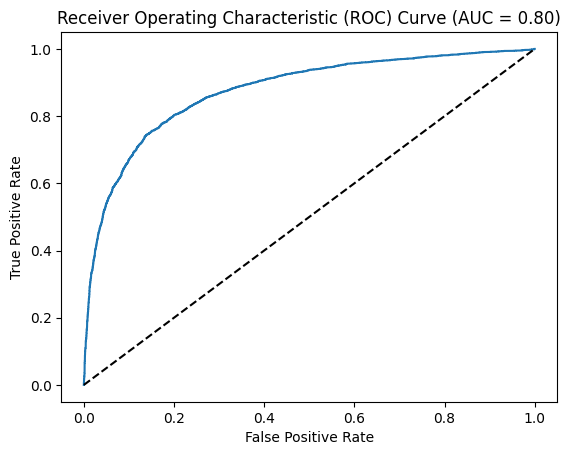

In [70]:
visulaize_roc_curve(y_val, y_val_pred_1_3, y_val_predProb_1_3)

### Best Model among 3

Selecting "model1_2" from logistic models as the best model because it gives the best metrics on validation set among all 3.

In [71]:
#combining train and validation set into a single train set
x = np.concatenate([x_train_normalized, x_val_normalized])
y = np.concatenate([y_train, y_val])

In [72]:
%%time

#taking the best model
model1 = model1_2

#fitting the model on training set (train+validation)
model1.fit(x, y)

CPU times: total: 37min 53s
Wall time: 5min 35s


LogisticRegression(max_iter=5000, random_state=0)

In [73]:
#accuracy scores on train and test sets
print("Train Set Score:", model1.score(x, y), "\n",
      "Test Set Score:", model1.score(x_test_normalized, y_test), "\n" )

Train Set Score: 0.83638 
 Test Set Score: 0.8166 



In [74]:
# predictions

#predicting values and probabilities on training set
y_train_pred_1 = model1.predict(x)
y_train_predProb_1 = model1.predict_proba(x)[:, 1]

#predicting values and probabilities on testing set
y_test_pred_1 = model1.predict(x_test_normalized)
y_test_predProb_1 = model1.predict_proba(x_test_normalized)[:, 1]

In [75]:
#saving the model
joblib.dump(model1, "Saved Models/model1.sav")

['Saved Models/model1.sav']

#### Metrics

Training Set

In [76]:
metrics_1_train = display_metrics(y, y_train_pred_1)

The accuracy is 83.638%

Precision: 0.8159653531519008

Recall score: 0.76305

F1 score: 0.7886210371289047

Confusion matrix is:
[[26558  3442]
 [ 4739 15261]]



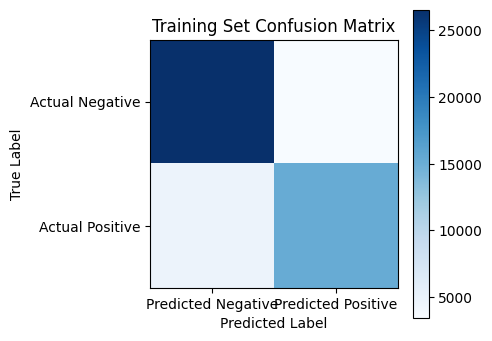

In [77]:
visualize_confusion_matrix(y, y_train_pred_1, title="Training Set Confusion Matrix")

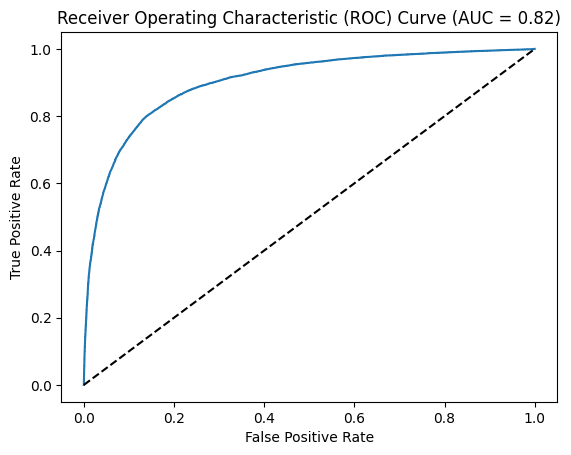

In [78]:
visulaize_roc_curve(y, y_train_pred_1, y_train_predProb_1)

Testing Set

In [79]:
metrics_1_test = display_metrics(y_test, y_test_pred_1)

The accuracy is 81.66%

Precision: 0.7915993537964459

Recall score: 0.735

F1 score: 0.762250453720508

Confusion matrix is:
[[5226  774]
 [1060 2940]]



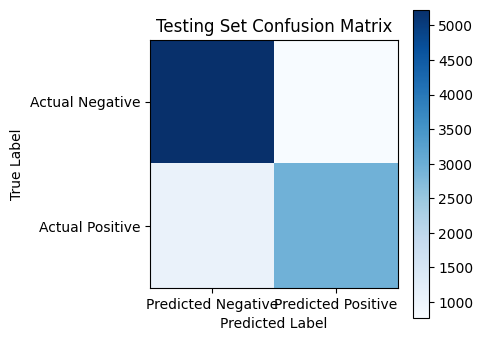

In [80]:
visualize_confusion_matrix(y_test, y_test_pred_1, title="Testing Set Confusion Matrix")

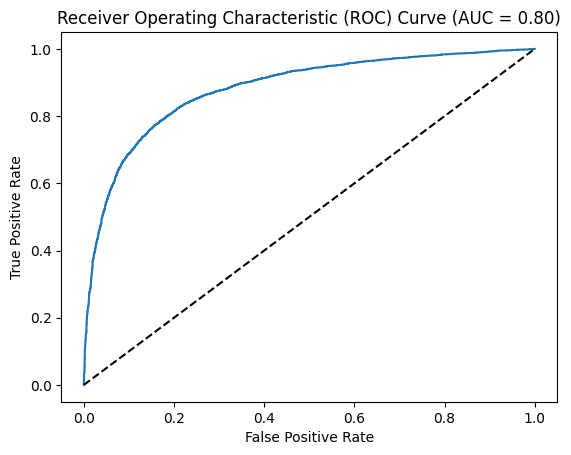

In [81]:
visulaize_roc_curve(y_test, y_test_pred_1, y_test_predProb_1)

## Non-Parametric Algorithm

Extreme Gradient Boosting (XGBoost)

In [82]:
class_ratio = (len(y_train[y_train == 0]) / len(y_train[y_train == 1]))

### Model #01

In [83]:
%%time

model2_1 = XGBClassifier(scale_pos_weight=class_ratio, max_depth=5, learning_rate=0.01)

model2_1.fit(x_train_normalized, y_train)

CPU times: total: 11min 9s
Wall time: 1min 45s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [84]:
#accuracy scores on train, validation and test sets
print("Train Set Score:", model2_1.score(x_train_normalized, y_train), "\n",
      "Validation Set Score:", model2_1.score(x_val_normalized, y_val), "\n",
      "Test Set Score:", model2_1.score(x_test_normalized, y_test), "\n" )

Train Set Score: 0.8307 
 Validation Set Score: 0.8091 
 Test Set Score: 0.8096 



In [85]:
# predictions

#predicting values and probabilities on training set
y_train_pred_2_1 = model2_1.predict(x_train_normalized)
y_train_predProb_2_1 = model2_1.predict_proba(x_train_normalized)[:, 1]

#predicting values and probabilities on validation set
y_val_pred_2_1 = model2_1.predict(x_val_normalized)
y_val_predProb_2_1 = model2_1.predict_proba(x_val_normalized)[:, 1]

In [86]:
#saving the model
joblib.dump(model2_1, "Saved Models/model2_1.sav")

['Saved Models/model2_1.sav']

#### Metrics

Training Metrics

In [87]:
metrics_2_1_train = display_metrics(y_train, y_train_pred_2_1)

The accuracy is 83.07%

Precision: 0.7784217834933285

Recall score: 0.806064395123476

F1 score: 0.7920019657227102

Confusion matrix is:
[[20335  3670]
 [ 3102 12893]]



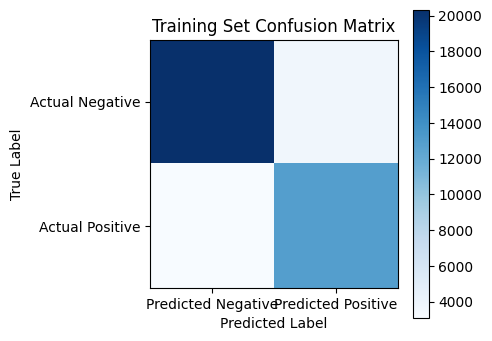

In [88]:
visualize_confusion_matrix(y_train, y_train_pred_2_1, title="Training Set Confusion Matrix")

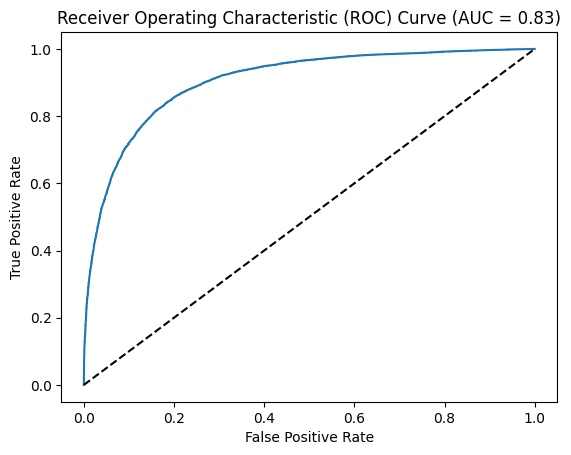

In [89]:
visulaize_roc_curve(y_train, y_train_pred_2_1, y_train_predProb_2_1)

Validation Set

In [90]:
metrics_2_1_val = display_metrics(y_val, y_val_pred_2_1)

The accuracy is 80.91000000000001%

Precision: 0.7543689320388349

Recall score: 0.7760299625468164

F1 score: 0.7650461538461539

Confusion matrix is:
[[4983 1012]
 [ 897 3108]]



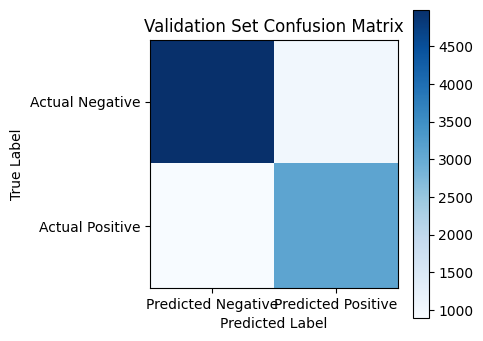

In [91]:
visualize_confusion_matrix(y_val, y_val_pred_2_1, title="Validation Set Confusion Matrix")

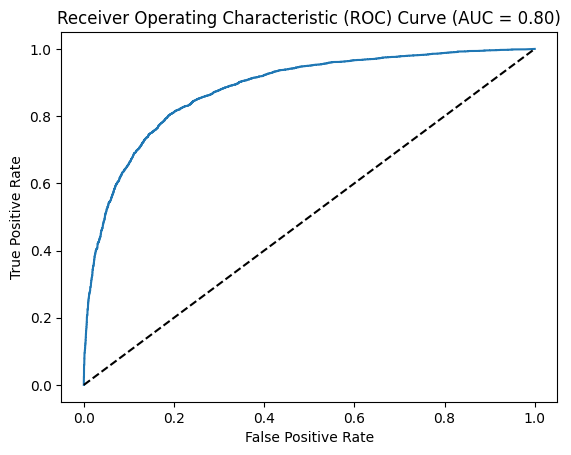

In [92]:
visulaize_roc_curve(y_val, y_val_pred_2_1, y_val_predProb_2_1)

### Model #02

In [93]:
%%time

model2_2 = XGBClassifier(scale_pos_weight=class_ratio, max_depth=7, learning_rate=0.001)

model2_2.fit(x_train_normalized, y_train)

CPU times: total: 20min 2s
Wall time: 3min 8s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [94]:
#accuracy scores on train, validation and test sets
print("Train Set Score:", model2_2.score(x_train_normalized, y_train), "\n",
      "Validation Set Score:", model2_2.score(x_val_normalized, y_val), "\n",
      "Test Set Score:", model2_2.score(x_test_normalized, y_test), "\n" )

Train Set Score: 0.843025 
 Validation Set Score: 0.7986 
 Test Set Score: 0.8026 



In [95]:
# predictions

#predicting values and probabilities on training set
y_train_pred_2_2 = model2_2.predict(x_train_normalized)
y_train_predProb_2_2 = model2_2.predict_proba(x_train_normalized)[:, 1]

#predicting values and probabilities on validation set
y_val_pred_2_2 = model2_2.predict(x_val_normalized)
y_val_predProb_2_2 = model2_2.predict_proba(x_val_normalized)[:, 1]

In [96]:
#saving the model
joblib.dump(model2_2, "Saved Models/model2_2.sav")

['Saved Models/model2_2.sav']

#### Metrics

Training Metrics

In [97]:
metrics_2_2_train = display_metrics(y_train, y_train_pred_2_2)

The accuracy is 84.30250000000001%

Precision: 0.793251237474345

Recall score: 0.8215692403876211

F1 score: 0.8071619422007923

Confusion matrix is:
[[20580  3425]
 [ 2854 13141]]



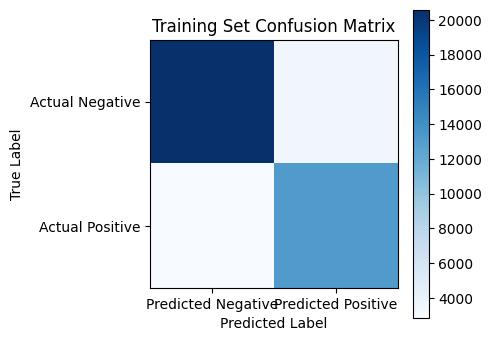

In [98]:
visualize_confusion_matrix(y_train, y_train_pred_2_2, title="Training Set Confusion Matrix")

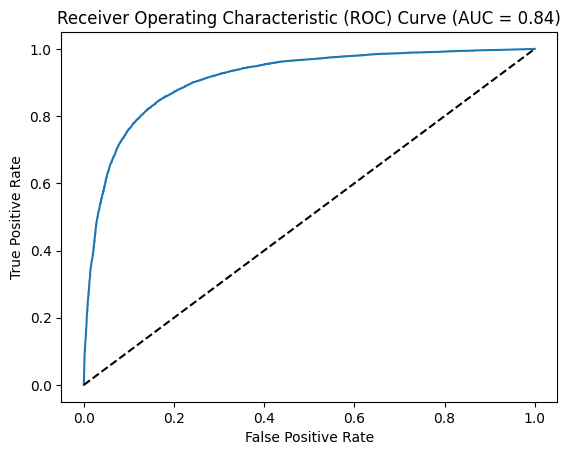

In [99]:
visulaize_roc_curve(y_train, y_train_pred_2_2, y_train_predProb_2_2)

Validation Metrics

In [100]:
metrics_2_2_val = display_metrics(y_val, y_val_pred_2_2)

The accuracy is 79.86%

Precision: 0.7376462162807352

Recall score: 0.7715355805243446

F1 score: 0.7542103978520869

Confusion matrix is:
[[4896 1099]
 [ 915 3090]]



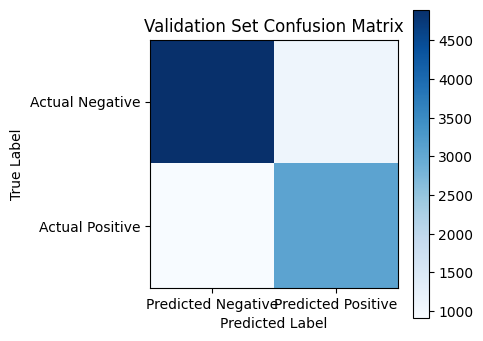

In [101]:
visualize_confusion_matrix(y_val, y_val_pred_2_2, title="Validation Set Confusion Matrix")

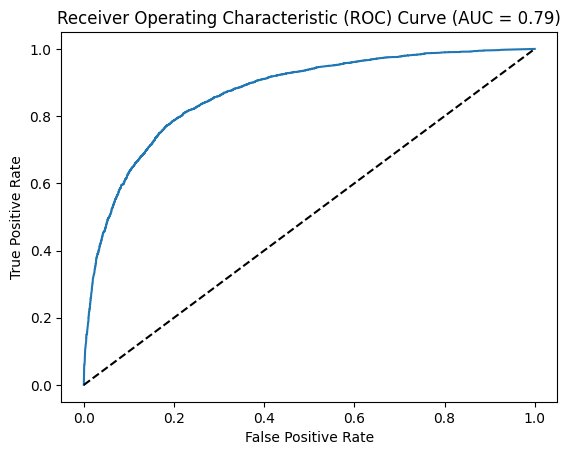

In [102]:
visulaize_roc_curve(y_val, y_val_pred_2_2, y_val_predProb_2_2)

### Model #03

In [103]:
%%time

model2_3 = XGBClassifier(scale_pos_weight=class_ratio, max_depth=3, learning_rate=0.1)

model2_3.fit(x_train_normalized, y_train)

CPU times: total: 6min 10s
Wall time: 58.8 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [104]:
#accuracy scores on train, validation and test sets
print("Train Set Score:", model2_3.score(x_train_normalized, y_train), "\n",
      "Validation Set Score:", model2_3.score(x_val_normalized, y_val), "\n",
      "Test Set Score:", model2_3.score(x_test_normalized, y_test), "\n" )

Train Set Score: 0.864075 
 Validation Set Score: 0.8455 
 Test Set Score: 0.8457 



In [105]:
# predictions

#predicting values and probabilities on training set
y_train_pred_2_3 = model2_3.predict(x_train_normalized)
y_train_predProb_2_3 = model2_3.predict_proba(x_train_normalized)[:, 1]

#predicting values and probabilities on validation set
y_val_pred_2_3 = model2_3.predict(x_val_normalized)
y_val_predProb_2_3 = model2_3.predict_proba(x_val_normalized)[:, 1]

In [106]:
#saving the model
joblib.dump(model2_3, "Saved Models/model2_3.sav")

['Saved Models/model2_3.sav']

#### Metrics

Training Metrics

In [107]:
metrics_2_3_train = display_metrics(y_train, y_train_pred_2_3)

The accuracy is 86.4075%

Precision: 0.8134053668962242

Recall score: 0.8565801813066584

F1 score: 0.8344346660982368

Confusion matrix is:
[[20862  3143]
 [ 2294 13701]]



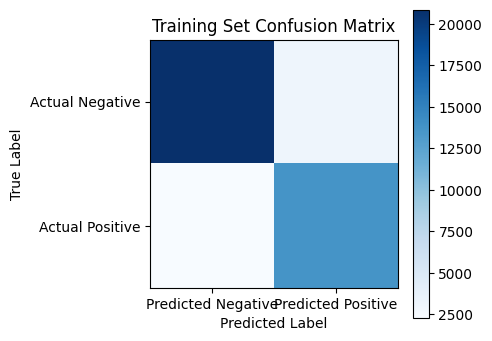

In [108]:
visualize_confusion_matrix(y_train, y_train_pred_2_3, title="Training Set Confusion Matrix")

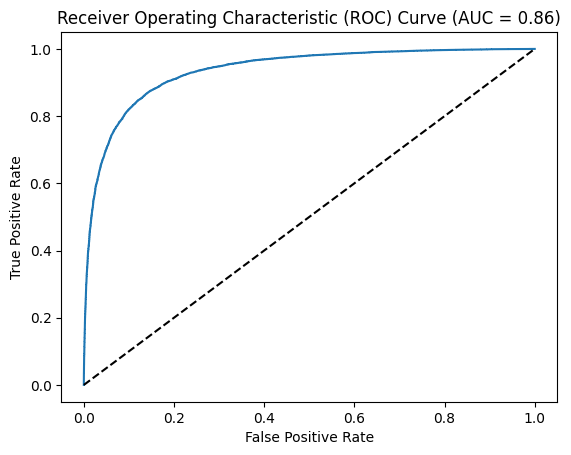

In [109]:
visulaize_roc_curve(y_train, y_train_pred_2_3, y_train_predProb_2_3)

Validation Metrics

In [110]:
metrics_2_3_val = display_metrics(y_val, y_val_pred_2_3)

The accuracy is 84.55%

Precision: 0.7939770554493308

Recall score: 0.8294631710362047

F1 score: 0.8113322750030528

Confusion matrix is:
[[5133  862]
 [ 683 3322]]



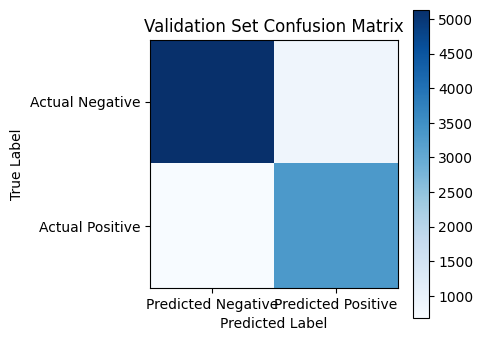

In [111]:
visualize_confusion_matrix(y_val, y_val_pred_2_3, title="Validation Set Confusion Matrix")

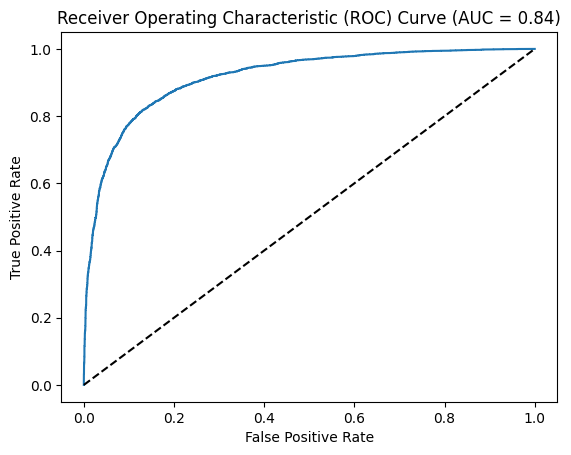

In [112]:
visulaize_roc_curve(y_val, y_val_pred_2_3, y_val_predProb_2_3)

### Best Model among 3

Selecting model2_3 from XGB models as the best model because it gives the best metrics on validation set among all 3.

In [113]:
#combining train and validation set into a single train set
x = np.concatenate([x_train_normalized, x_val_normalized])
y = np.concatenate([y_train, y_val])

In [114]:
%%time

#taking the best model
model2 = model2_3

#fitting the model on training set (train+validation)
model2.fit(x, y)

CPU times: total: 7min 41s
Wall time: 1min 13s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [115]:
#accuracy scores on train and test sets
print("Train Set Score:", model2.score(x, y), "\n",
      "Test Set Score:", model2.score(x_test_normalized, y_test), "\n" )

Train Set Score: 0.86278 
 Test Set Score: 0.8506 



In [116]:
# predictions

#predicting values and probabilities on training set
y_train_pred_2 = model2.predict(x)
y_train_predProb_2 = model2.predict_proba(x)[:, 1]

#predicting values and probabilities on testing set
y_test_pred_2 = model2.predict(x_test_normalized)
y_test_predProb_2 = model2.predict_proba(x_test_normalized)[:, 1]

In [117]:
#saving the model
joblib.dump(model2, "Saved Models/model2.sav")

['Saved Models/model2.sav']

#### Metrics

Training Set

In [118]:
metrics_2_train = display_metrics(y, y_train_pred_2)

The accuracy is 86.278%

Precision: 0.812045789198689

Recall score: 0.8548

F1 score: 0.8328745767666187

Confusion matrix is:
[[26043  3957]
 [ 2904 17096]]



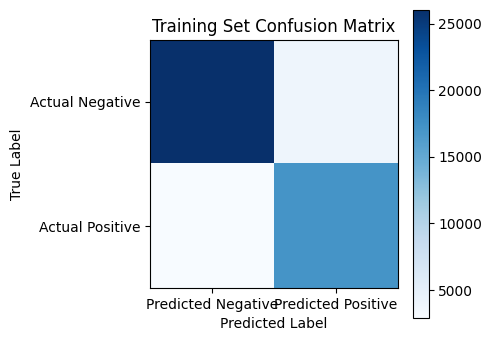

In [119]:
visualize_confusion_matrix(y, y_train_pred_2, title="Training Set Confusion Matrix")

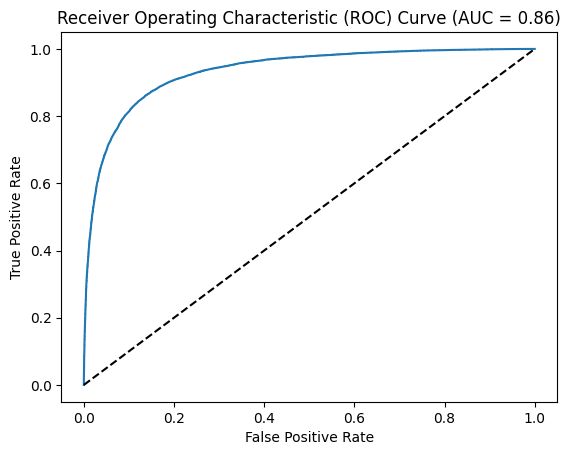

In [120]:
visulaize_roc_curve(y, y_train_pred_2, y_train_predProb_2)

Testing Set

In [121]:
metrics_2_test = display_metrics(y_test, y_test_pred_1)

The accuracy is 81.66%

Precision: 0.7915993537964459

Recall score: 0.735

F1 score: 0.762250453720508

Confusion matrix is:
[[5226  774]
 [1060 2940]]



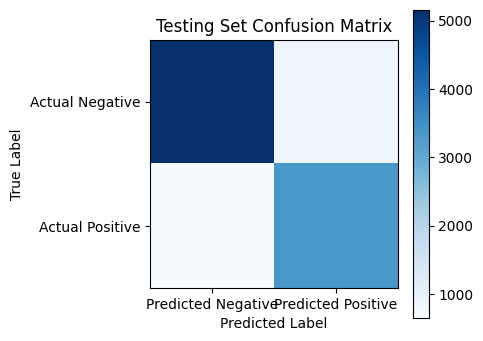

In [122]:
visualize_confusion_matrix(y_test, y_test_pred_2, title="Testing Set Confusion Matrix")

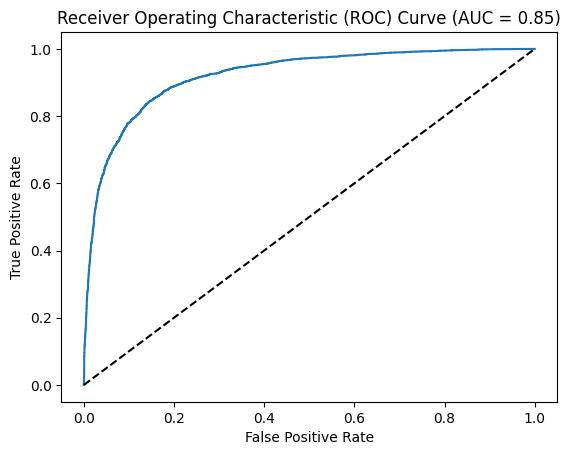

In [123]:
visulaize_roc_curve(y_test, y_test_pred_2, y_test_predProb_2)

## Neural Network Architecture
Convolutional Neural Network (CNN)

#### Custom Pytorch Dataset Creation

In [157]:
# inherit pytorch Dataset class for starting
class CustomDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        # features
        self.data = data
        # targets
        self.labels = labels
        # transformations
        self.transform = transform

    # these functions are needed as can be seen in the documentation of pytorch
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img = self.data[idx]
        label = self.labels[idx]
        if self.transform:
            img = self.transform(img)
        return (img, label)

#### Data  Transformation & DataLoaders Creation

In [160]:
animals = [2, 3, 4, 5, 6, 7] # 0 label
# indices for labels: ['bird', 'cat', 'deer', 'dog', 'frog', 'horse']
vehicles = [0, 1, 8, 9] # 1 label
# indices for labels: ['airplane', 'automobile', 'ship', 'truck']

traindata_array = np.vstack([data1[b'data'],data2[b'data'],data3[b'data'],data4[b'data'],data5[b'data']])
testdata_array = test[b'data']

# tensors require permutation of (1,2,0) for changing (3,32,32) to (32,32,3)
# here the array would need permute(transpose) of (0,2,3,1) since the first dimension denotes no. of images (50000)
traindata = traindata_array.reshape(50000,3,32,32).transpose(0,2,3,1)
trainlabels = pd.Series(np.hstack([data1[b'labels'], data2[b'labels'], data3[b'labels'], data4[b'labels'], data5[b'labels']]))
# binarize the targets
if len(trainlabels.value_counts()) > 2:
    trainlabels = [0 if x in animals else 1 for x in trainlabels]

testdata = testdata_array.reshape(10000,3,32,32).transpose(0,2,3,1)
testlabels = pd.Series(test[b'labels'])

if len(testlabels.value_counts()) > 2:
    testlabels = [0 if x in animals else 1 for x in testlabels]

# transformations include ToTensor which normalizes the data automatically to 0-1 range, then makes tensors 
# Normalize normalizes the pixel RGB values to 0.5 mean and 0.5 std
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# create CustomDataset objects then load using pytorch DataLoader
trainset = CustomDataset(data=traindata, labels=trainlabels, transform=transform)
trainloader = DataLoader(dataset=trainset, batch_size=32, shuffle=True)

testset = CustomDataset(data=testdata, labels=testlabels, transform=transform)
testloader = DataLoader(dataset=testset, batch_size=32, shuffle=True)

# check for cuda (gpu)
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


#### Custom CNN Class

In [163]:
class ConvNet(nn.Module):
    def __init__(self, conv_kernel_size=3, pool_kernel_size=2, stride=1, padding=1):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=conv_kernel_size, stride=stride, padding=padding)
        self.bn1 = nn.BatchNorm2d(num_features=12)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=pool_kernel_size)

        self.conv2 = nn.Conv2d(in_channels=12, out_channels=20, kernel_size=conv_kernel_size, stride=stride, padding=padding)
        self.relu2 = nn.ReLU()

        self.conv3 = nn.Conv2d(in_channels=20, out_channels=32, kernel_size=conv_kernel_size, stride=stride, padding=padding)
        self.bn3 = nn.BatchNorm2d(num_features=32)
        self.relu3 = nn.ReLU()

        # on output layer only ReLU is used here since the loss function used here is Binary Cross Entropy With Logits Loss
        # BCEWithLogitsLoss has a built in sigmoid activation which is applied on the output layer automatically when loss function is called(as can be seen on pytorch documentation)
        # however sigmoid is separately applied on outputs during calculation of prediction as well, since the model originally returns logits instead of probabilities
        # and the bcewithlogitsloss only applies sigmoid for the model to learn instead of changing the outputs
        self.fc = nn.Linear(in_features=32 * 16 * 16, out_features=1)

    def forward(self, input):
        output = self.conv1(input)
        output = self.bn1(output)
        output = self.relu1(output)
        output = self.pool(output)

        output = self.conv2(output)
        output = self.relu2(output)

        output = self.conv3(output)
        output = self.bn3(output)
        output = self.relu3(output)

        output = output.view(-1, 32 * 16 * 16)
        output = self.fc(output)

        return output

#### Model Training Functions on Train and Dev sets with Metrics Calculations

In [329]:
def train_epoch(model,device,dataloader,loss_fn,optimizer,metric_list):
    train_loss,train_correct=0.0,0
    model.train()
    for images, labels in dataloader:

        # send features and targets to device
        images,labels = images.to(device),labels.to(device)
        # initialize Adam optimizer to zero gradient
        optimizer.zero_grad()
        # feed forward
        output = model(images)

        metric_list[0].update(output.squeeze(),labels)
        metric_list[1].update(output.squeeze(),labels)
        metric_list[2].update(output.squeeze(),labels)
        metric_list[3].update(output.squeeze(),labels)
        metric_list[4].update(output.squeeze(),labels)
        
        # calculate loss
        loss = loss_fn(output.squeeze(), labels.float())     # Squeeze the output and convert labels to float
        # backward propagation
        loss.backward()
        optimizer.step()
        # compute losses and accuracies
        train_loss += loss.cpu().data * images.size(0)
        predictions = torch.round(torch.sigmoid(output))    # Apply sigmoid activation to logits and round to obtain binary predictions
        train_correct += int(torch.sum(predictions.squeeze() == labels.byte()))    # Convert predictions and labels to byte tensor

    return train_loss,train_correct,output,labels

def valid_epoch(model,device,dataloader,loss_fn,metric_list):
    valid_loss, val_correct = 0.0, 0
    model.eval()
    for images, labels in dataloader:

        images,labels = images.to(device),labels.to(device)
        output = model(images)

        metric_list[0].update(output.squeeze(),labels)
        metric_list[1].update(output.squeeze(),labels)
        metric_list[2].update(output.squeeze(),labels)
        metric_list[3].update(output.squeeze(),labels)
        metric_list[4].update(output.squeeze(),labels)
        
        loss = loss_fn(output.squeeze(), labels.float())
        valid_loss += loss.cpu().data * images.size(0)
        predictions = torch.round(torch.sigmoid(output))
        val_correct += int(torch.sum(predictions.squeeze() == labels.byte()))

    return valid_loss,val_correct,output,labels

def train_cnn(conv_net_class, model_name, learning_rate=0.001, weight_decay=0.0001, num_epochs=10, batch_size=32):

    # initialize criterion with loss function
    criterion = nn.BCEWithLogitsLoss()

    num_epochs = num_epochs

    # define 5 folds
    k=5
    splits=KFold(n_splits=k,shuffle=True,random_state=42)
    # create a dictionary for recording model histories
    foldperf={}
    # initialize dataset to only trainset since train and validation splits would be made from the maine trainset only
    dataset = trainset

    train_count = len(trainloader.dataset)
    test_count = len(testloader.dataset)
    best_accuracy = 0.0

    train_true_labels = []
    train_predicted_probs = []
    
    valid_true_labels = []
    valid_predicted_probs = []

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    train_metric1 = BinaryAccuracy(device=device)
    train_metric2 = BinaryConfusionMatrix(device=device)
    train_metric3 = BinaryPrecision(device=device)
    train_metric4 = BinaryRecall(device=device)
    train_metric5 = BinaryF1Score(device=device)

    valid_metric1 = BinaryAccuracy(device=device)
    valid_metric2 = BinaryConfusionMatrix(device=device)
    valid_metric3 = BinaryPrecision(device=device)
    valid_metric4 = BinaryRecall(device=device)
    valid_metric5 = BinaryF1Score(device=device)


    for fold, (train_idx,val_idx) in enumerate(splits.split(np.arange(len(dataset)))):

        print('Fold {}'.format(fold + 1))

        train_sampler = SubsetRandomSampler(train_idx)
        valid_sampler = SubsetRandomSampler(val_idx)
        train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
        valid_loader = DataLoader(dataset, batch_size=batch_size, sampler=valid_sampler)

        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        model = conv_net_class
        model.to(device)
        optimizer = Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

        history = {'train_loss': [], 'valid_loss': [],'train_acc':[],'valid_acc':[]}

        for epoch in range(num_epochs):
            train_loss, train_correct, train_output, train_labels = train_epoch(model,device,train_loader,criterion,optimizer,[train_metric1,train_metric2,train_metric3,train_metric4,train_metric5])
            valid_loss, valid_correct, valid_output, valid_labels = valid_epoch(model,device,valid_loader,criterion,[valid_metric1,valid_metric2,valid_metric3,valid_metric4,valid_metric5])

            train_loss = train_loss / len(train_loader.sampler)
            train_acc = train_correct / len(train_loader.sampler) * 100
            valid_loss = valid_loss / len(valid_loader.sampler)
            valid_acc = valid_correct / len(valid_loader.sampler) * 100

            #for roc curve
            train_predictions = torch.sigmoid(train_output).cpu().detach().numpy()  # Convert predictions to numpy array
            train_true_labels.extend(train_labels.cpu().numpy())  # Convert labels to numpy array and extend the true_labels list
            train_predicted_probs.extend(train_predictions)  # Extend the predicted_probs list with the predicted probabilities

            valid_predictions = torch.sigmoid(valid_output).cpu().detach().numpy()  # Convert predictions to numpy array
            valid_true_labels.extend(valid_labels.cpu().numpy())  # Convert labels to numpy array and extend the true_labels list
            valid_predicted_probs.extend(valid_predictions)  # Extend the predicted_probs list with the predicted probabilities

            print("Epoch:{:02d}/{} AVG Training Loss:{:.3f} \
            AVG Validation Loss:{:.3f} \
            AVG Training Acc {:.2f} % \
            AVG Validation Acc {:.2f} %".format(epoch + 1,
                                                num_epochs,
                                                train_loss,
                                                valid_loss,
                                                train_acc,
                                                valid_acc))

            history['train_loss'].append(train_loss)
            history['valid_loss'].append(valid_loss)
            history['train_acc'].append(train_acc)
            history['valid_acc'].append(valid_acc)

            train_metrics=[train_metric1.compute().item(), [[train_metric2.compute()[0][0].item(),train_metric2.compute()[0][1].item()],
                                                            [train_metric2.compute()[1][0].item(),train_metric2.compute()[1][1].item()]],
                     train_metric3.compute().item(), train_metric4.compute().item(), train_metric5.compute().item()]
            valid_metrics=[valid_metric1.compute().item(), [[valid_metric2.compute()[0][0].item(),valid_metric2.compute()[0][1].item()],
                                                            [valid_metric2.compute()[1][0].item(),valid_metric2.compute()[1][1].item()]],
                     valid_metric3.compute().item(), valid_metric4.compute().item(), valid_metric5.compute().item()]

            # save the best performing model
            if valid_acc > best_accuracy:
                torch.save(model.state_dict(), "Saved Models/"+model_name+'.pt')
                best_accuracy = valid_acc

        # record history
        foldperf['fold{}'.format(fold+1)] = history

        print()
        print('Training Metrics after fold {}:'.format(fold+1))
        print('Accuracy: {:.2f}% \
        Precision: {:.2f}% \
        Recall Score: {:.2f}% \
        F1 Score: {:.2f}% \
        Confusion Matrix: {}'. format(train_metrics[0]*100,
                                      train_metrics[2]*100,
                                      train_metrics[3]*100,
                                      train_metrics[4]*100,
                                      train_metrics[1]))

        print('Validation Metrics after fold {}:'.format(fold+1))
        print('Accuracy: {:.2f}% \
        Precision: {:.2f}% \
        Recall Score: {:.2f}% \
        F1 Score: {:.2f}% \
        Confusion Matrix: {}'. format(valid_metrics[0]*100,
                                      valid_metrics[2]*100,
                                      valid_metrics[3]*100,
                                      valid_metrics[4]*100,
                                      valid_metrics[1]))
        print()

    return foldperf, [train_metrics[0], train_metrics[2], train_metrics[3], train_metrics[4], train_metrics[1]], [valid_metrics[0], valid_metrics[2], valid_metrics[3], valid_metrics[4], valid_metrics[1]], train_true_labels,train_predicted_probs,valid_true_labels,valid_predicted_probs

#### Model #01

In [330]:
%%time

ConvNet1 = ConvNet(conv_kernel_size=3, pool_kernel_size=2, stride=1, padding=1)
model3_1, metrics_3_1_train, metrics_3_1_val, \
model3_1_train_true_labels, model3_1_train_predicted_probs, \
model3_1_valid_true_labels, model3_1_valid_predicted_probs,  = train_cnn(ConvNet1, 'model3_1', learning_rate=0.001, weight_decay=0.0001, num_epochs=10, batch_size=32)

Fold 1
Epoch:01/10 AVG Training Loss:0.277             AVG Validation Loss:0.212             AVG Training Acc 88.68 %             AVG Validation Acc 91.69 %
Epoch:02/10 AVG Training Loss:0.209             AVG Validation Loss:0.192             AVG Training Acc 91.69 %             AVG Validation Acc 92.49 %
Epoch:03/10 AVG Training Loss:0.183             AVG Validation Loss:0.219             AVG Training Acc 92.79 %             AVG Validation Acc 91.16 %
Epoch:04/10 AVG Training Loss:0.168             AVG Validation Loss:0.166             AVG Training Acc 93.36 %             AVG Validation Acc 93.38 %
Epoch:05/10 AVG Training Loss:0.155             AVG Validation Loss:0.161             AVG Training Acc 93.76 %             AVG Validation Acc 93.85 %
Epoch:06/10 AVG Training Loss:0.139             AVG Validation Loss:0.162             AVG Training Acc 94.47 %             AVG Validation Acc 93.31 %
Epoch:07/10 AVG Training Loss:0.129             AVG Validation Loss:0.162             AVG Tra

In [331]:
# Scaling confusion matrix to 50000 samples total by dividing with (number of epochs * folds)
if sum([sum(metrics_3_1_train[-1][0]),sum(metrics_3_1_train[-1][1])]) != 40000:
    for i in range(len(metrics_3_1_train[-1])):
        for j in range(len(metrics_3_1_train[-1][i])):
            metrics_3_1_train[-1][i][j] = round(metrics_3_1_train[-1][i][j]/50)
if sum([sum(metrics_3_1_val[-1][0]),sum(metrics_3_1_val[-1][1])]) != 10000:
    for i in range(len(metrics_3_1_val[-1])):
        for j in range(len(metrics_3_1_val[-1][i])):
            metrics_3_1_val[-1][i][j] = round(metrics_3_1_val[-1][i][j]/50)

#### Model3_1 Train Set ROC Curve and Confusion Matrix

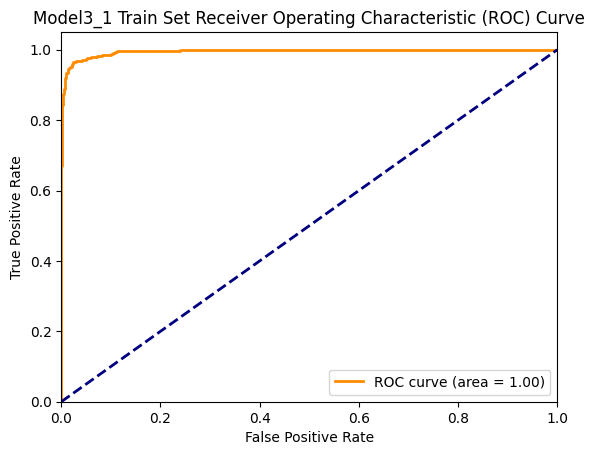

In [337]:
fpr, tpr, thresholds = roc_curve(model3_1_train_true_labels, model3_1_train_predicted_probs)

# Calculate the Area Under the Curve (AUC)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model3_1 Train Set Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


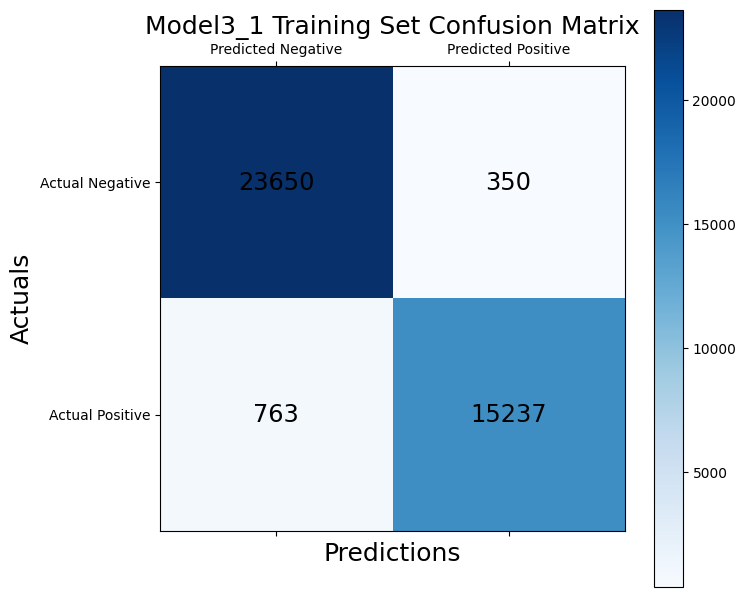

In [344]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(metrics_3_1_train[-1], cmap=plt.cm.Blues, alpha=0.3)
for i in range(len(metrics_3_1_train[-1])):
    for j in range(len(metrics_3_1_train[-1][0])):
        ax.text(x=j, y=i,s=metrics_3_1_train[-1][i][j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.imshow(metrics_3_1_train[-1], interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])
plt.title('Model3_1 Training Set Confusion Matrix', fontsize=18)
plt.show()


#### Model3_1 Valid Set ROC Curve and Confusion Matrix

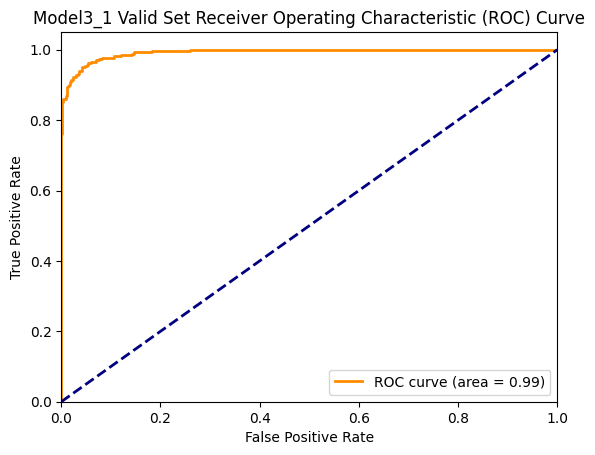

In [338]:
fpr, tpr, thresholds = roc_curve(model3_1_valid_true_labels, model3_1_valid_predicted_probs)

# Calculate the Area Under the Curve (AUC)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model3_1 Valid Set Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


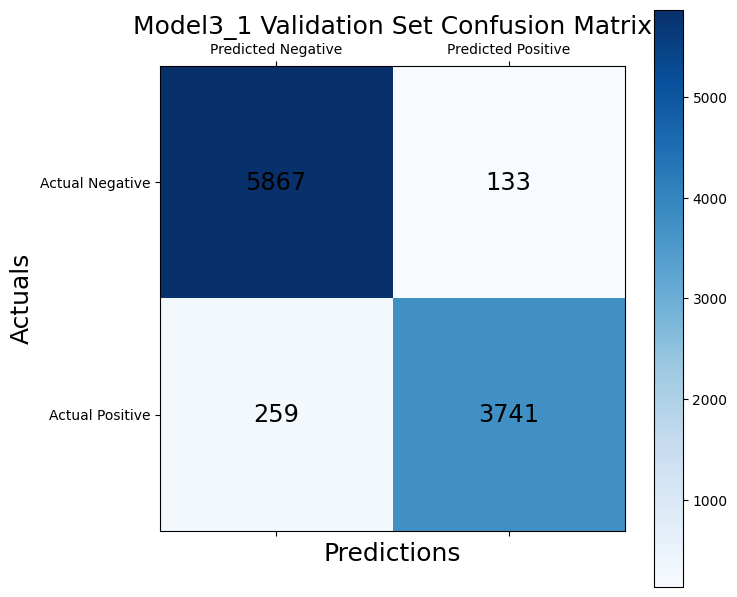

In [345]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(metrics_3_1_val[-1], cmap=plt.cm.Blues, alpha=0.3)
for i in range(len(metrics_3_1_val[-1])):
    for j in range(len(metrics_3_1_val[-1][0])):
        ax.text(x=j, y=i,s=metrics_3_1_val[-1][i][j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.imshow(metrics_3_1_val[-1], interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])
plt.title('Model3_1 Validation Set Confusion Matrix', fontsize=18)
plt.show()


#### Model #02

In [341]:
%%time

ConvNet2 = ConvNet(conv_kernel_size=5, pool_kernel_size=2, stride=1, padding=2)
model3_2, metrics_3_2_train, metrics_3_2_val, \
model3_2_train_true_labels, model3_2_train_predicted_probs, \
model3_2_valid_true_labels, model3_2_valid_predicted_probs = train_cnn(ConvNet2, 'model3_2', learning_rate=0.01, weight_decay=0.001, num_epochs=7, batch_size=128)

Fold 1
Epoch:01/7 AVG Training Loss:0.468             AVG Validation Loss:0.292             AVG Training Acc 84.73 %             AVG Validation Acc 87.78 %
Epoch:02/7 AVG Training Loss:0.252             AVG Validation Loss:0.258             AVG Training Acc 90.01 %             AVG Validation Acc 89.75 %
Epoch:03/7 AVG Training Loss:0.232             AVG Validation Loss:0.259             AVG Training Acc 90.54 %             AVG Validation Acc 89.61 %
Epoch:04/7 AVG Training Loss:0.220             AVG Validation Loss:0.227             AVG Training Acc 91.39 %             AVG Validation Acc 90.76 %
Epoch:05/7 AVG Training Loss:0.221             AVG Validation Loss:0.268             AVG Training Acc 91.20 %             AVG Validation Acc 89.63 %
Epoch:06/7 AVG Training Loss:0.214             AVG Validation Loss:0.241             AVG Training Acc 91.44 %             AVG Validation Acc 90.03 %
Epoch:07/7 AVG Training Loss:0.212             AVG Validation Loss:0.228             AVG Training A

In [346]:
# Scaling confusion matrix to 50000 samples total by dividing with (number of epochs * folds)
if sum([sum(metrics_3_2_train[-1][0]),sum(metrics_3_2_train[-1][1])]) != 40000:
    for i in range(len(metrics_3_2_train[-1])):
        for j in range(len(metrics_3_2_train[-1][i])):
            metrics_3_2_train[-1][i][j] = round(metrics_3_2_train[-1][i][j]/35)
if sum([sum(metrics_3_2_val[-1][0]),sum(metrics_3_2_val[-1][1])]) != 10000:
    for i in range(len(metrics_3_2_val[-1])):
        for j in range(len(metrics_3_2_val[-1][i])):
            metrics_3_2_val[-1][i][j] = round(metrics_3_2_val[-1][i][j]/35)

#### Model3_2 Train Set ROC Curve and Confusion Matrix

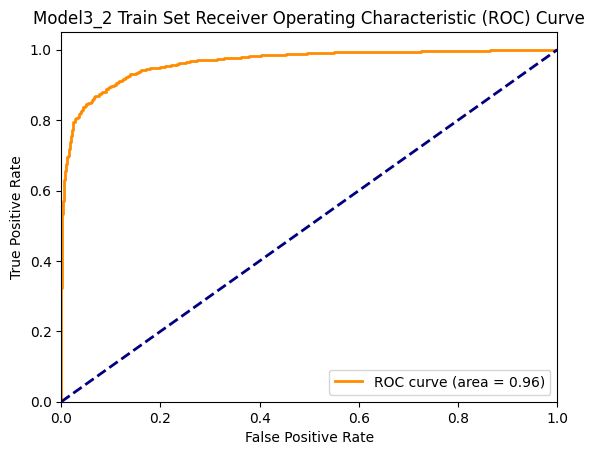

In [347]:
fpr, tpr, thresholds = roc_curve(model3_2_train_true_labels, model3_2_train_predicted_probs)

# Calculate the Area Under the Curve (AUC)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model3_2 Train Set Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


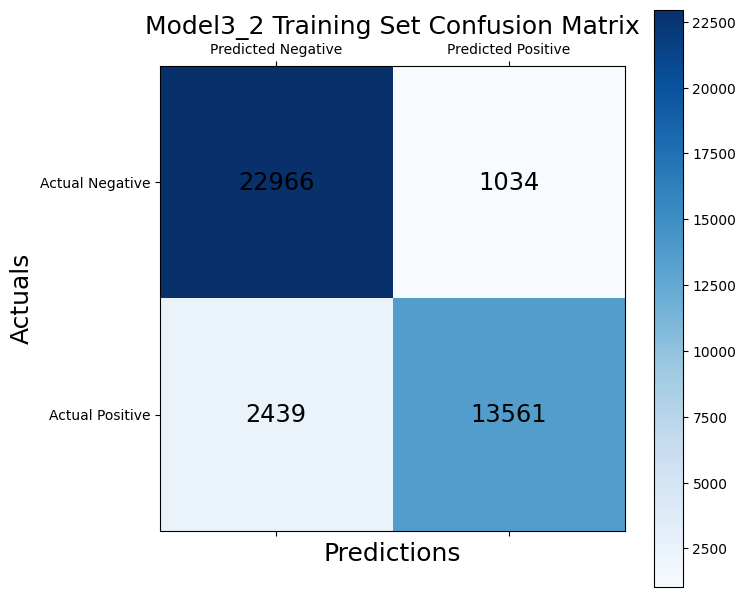

In [348]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(metrics_3_2_train[-1], cmap=plt.cm.Blues, alpha=0.3)
for i in range(len(metrics_3_2_train[-1])):
    for j in range(len(metrics_3_2_train[-1][0])):
        ax.text(x=j, y=i,s=metrics_3_2_train[-1][i][j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.imshow(metrics_3_2_train[-1], interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])
plt.title('Model3_2 Training Set Confusion Matrix', fontsize=18)
plt.show()


#### Model3_2 Valid Set ROC Curve and Confusion Matrix

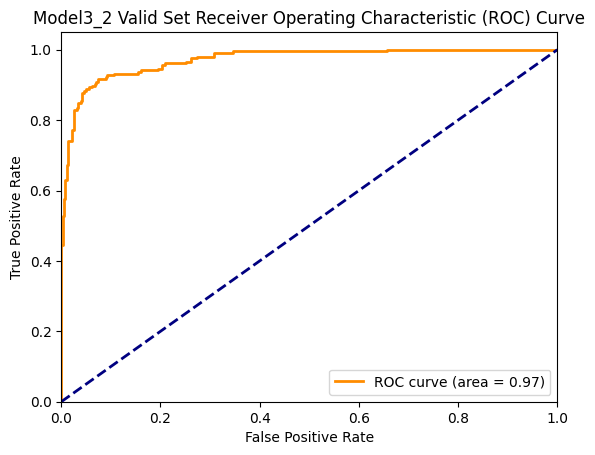

In [349]:
fpr, tpr, thresholds = roc_curve(model3_2_valid_true_labels, model3_2_valid_predicted_probs)

# Calculate the Area Under the Curve (AUC)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model3_2 Valid Set Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


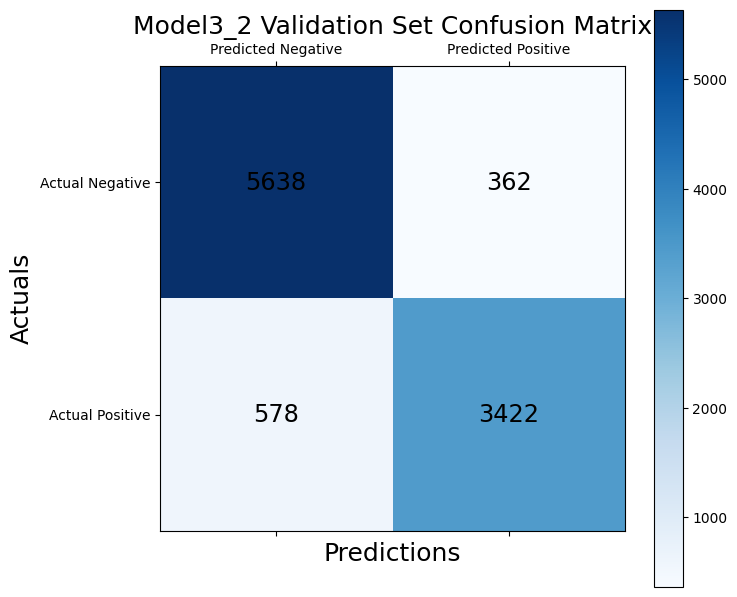

In [350]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(metrics_3_2_val[-1], cmap=plt.cm.Blues, alpha=0.3)
for i in range(len(metrics_3_2_val[-1])):
    for j in range(len(metrics_3_2_val[-1][0])):
        ax.text(x=j, y=i,s=metrics_3_2_val[-1][i][j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.imshow(metrics_3_2_val[-1], interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])
plt.title('Model3_2 Validation Set Confusion Matrix', fontsize=18)
plt.show()


#### Model #03

In [366]:
%%time

ConvNet3 = ConvNet(conv_kernel_size=7, pool_kernel_size=2, stride=1, padding=3)
model3_3, metrics_3_3_train, metrics_3_3_val, \
model3_3_train_true_labels, model3_3_train_predicted_probs, \
model3_3_valid_true_labels, model3_3_valid_predicted_probs = train_cnn(ConvNet3, 'model3_3', learning_rate=0.1, weight_decay=0.01, num_epochs=12, batch_size=256)

Fold 1
Epoch:01/12 AVG Training Loss:1.887             AVG Validation Loss:0.616             AVG Training Acc 71.78 %             AVG Validation Acc 72.24 %
Epoch:02/12 AVG Training Loss:0.451             AVG Validation Loss:0.516             AVG Training Acc 80.47 %             AVG Validation Acc 73.69 %
Epoch:03/12 AVG Training Loss:0.429             AVG Validation Loss:0.892             AVG Training Acc 81.60 %             AVG Validation Acc 59.91 %
Epoch:04/12 AVG Training Loss:0.451             AVG Validation Loss:0.434             AVG Training Acc 80.62 %             AVG Validation Acc 81.79 %
Epoch:05/12 AVG Training Loss:0.476             AVG Validation Loss:0.510             AVG Training Acc 79.06 %             AVG Validation Acc 73.72 %
Epoch:06/12 AVG Training Loss:0.462             AVG Validation Loss:0.516             AVG Training Acc 80.01 %             AVG Validation Acc 74.49 %
Epoch:07/12 AVG Training Loss:0.449             AVG Validation Loss:0.477             AVG Tra

In [367]:
# Scaling confusion matrix to 50000 samples total by dividing with (number of epochs * folds)
if sum([sum(metrics_3_3_train[-1][0]),sum(metrics_3_3_train[-1][1])]) != 40000:
    for i in range(len(metrics_3_3_train[-1])):
        for j in range(len(metrics_3_3_train[-1][i])):
            metrics_3_3_train[-1][i][j] = round(metrics_3_3_train[-1][i][j]/60)
if sum([sum(metrics_3_3_val[-1][0]),sum(metrics_3_3_val[-1][1])]) != 10000:
    for i in range(len(metrics_3_3_val[-1])):
        for j in range(len(metrics_3_3_val[-1][i])):
            metrics_3_3_val[-1][i][j] = round(metrics_3_3_val[-1][i][j]/60)

#### Model3_3 Train Set ROC Curve and Confusion Matrix

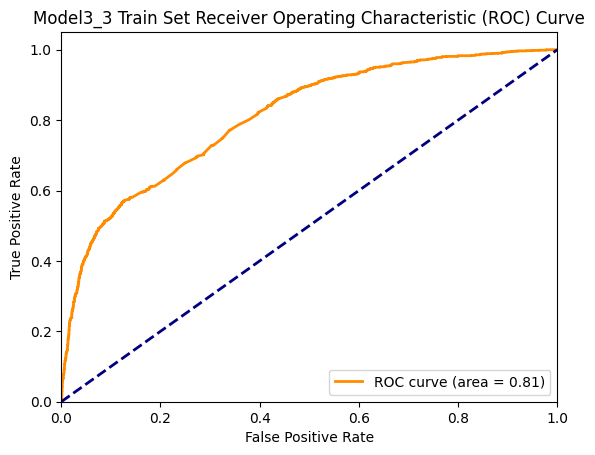

In [368]:
fpr, tpr, thresholds = roc_curve(model3_3_train_true_labels, model3_3_train_predicted_probs)

# Calculate the Area Under the Curve (AUC)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model3_3 Train Set Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


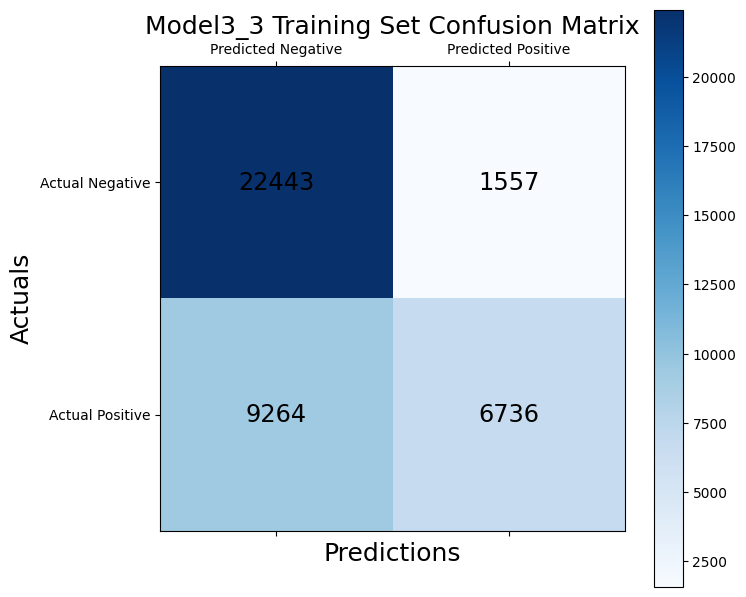

In [369]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(metrics_3_3_train[-1], cmap=plt.cm.Blues, alpha=0.3)
for i in range(len(metrics_3_3_train[-1])):
    for j in range(len(metrics_3_3_train[-1][0])):
        ax.text(x=j, y=i,s=metrics_3_3_train[-1][i][j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.imshow(metrics_3_3_train[-1], interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])
plt.title('Model3_3 Training Set Confusion Matrix', fontsize=18)
plt.show()


#### Model3_3 Valid Set ROC Curve and Confusion Matrix

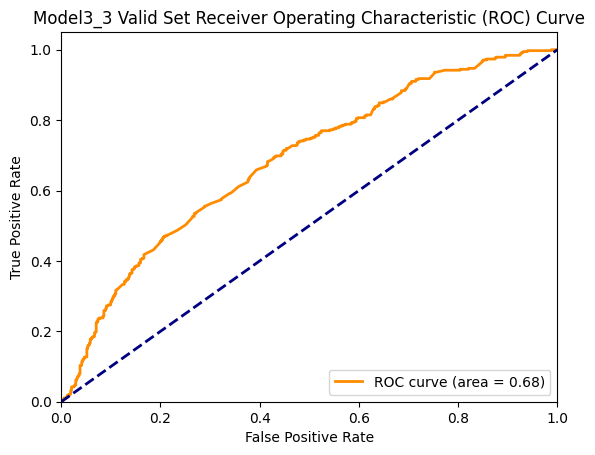

In [370]:
fpr, tpr, thresholds = roc_curve(model3_3_valid_true_labels, model3_3_valid_predicted_probs)

# Calculate the Area Under the Curve (AUC)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model3_3 Valid Set Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


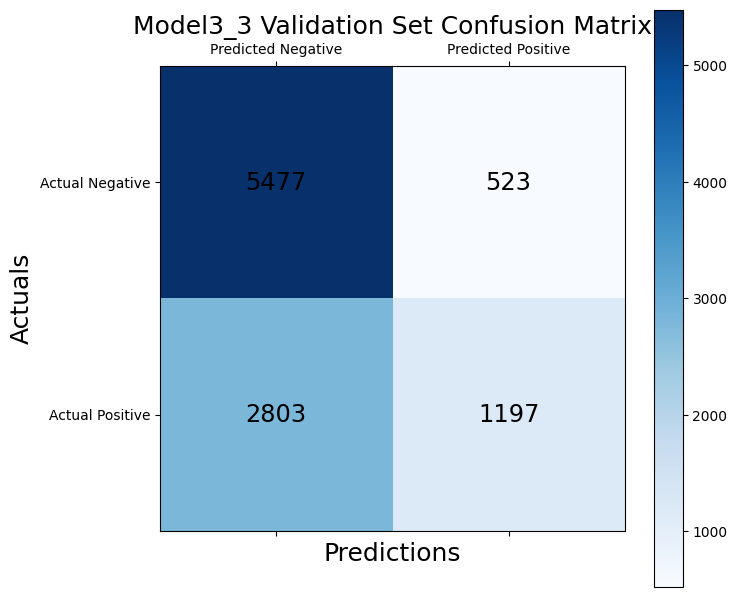

In [371]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(metrics_3_3_val[-1], cmap=plt.cm.Blues, alpha=0.3)
for i in range(len(metrics_3_3_val[-1])):
    for j in range(len(metrics_3_3_val[-1][0])):
        ax.text(x=j, y=i,s=metrics_3_3_val[-1][i][j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.imshow(metrics_3_3_val[-1], interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])
plt.title('Model3_3 Validation Set Confusion Matrix', fontsize=18)
plt.show()


#### Average Scores for Model #01

In [372]:
testl_f,tl_f,testa_f,ta_f=[],[],[],[]
k=5
for f in range(1,k+1):

     tl_f.append(np.mean(model3_1['fold{}'.format(f)]['train_loss']))
     testl_f.append(np.mean(model3_1['fold{}'.format(f)]['valid_loss']))

     ta_f.append(np.mean(model3_1['fold{}'.format(f)]['train_acc']))
     testa_f.append(np.mean(model3_1['fold{}'.format(f)]['valid_acc']))

print('Performance of {} fold cross validation on model3_1'.format(k))
print("Average Training Loss: {:.3f} \t Average Valid Loss: {:.3f} \t Average Training Acc: {:.2f} \t Average Valid Acc: {:.2f}".format(np.mean(tl_f),
                                                                                                    np.mean(testl_f),np.mean(ta_f),np.mean(testa_f)))


Performance of 5 fold cross validation on model3_1
Average Training Loss: 0.070 	 Average Valid Loss: 0.101 	 Average Training Acc: 97.33 	 Average Valid Acc: 96.20


#### Average Scores for Model #02

In [373]:
testl_f,tl_f,testa_f,ta_f=[],[],[],[]
k=5
for f in range(1,k+1):

     tl_f.append(np.mean(model3_2['fold{}'.format(f)]['train_loss']))
     testl_f.append(np.mean(model3_2['fold{}'.format(f)]['valid_loss']))

     ta_f.append(np.mean(model3_2['fold{}'.format(f)]['train_acc']))
     testa_f.append(np.mean(model3_2['fold{}'.format(f)]['valid_acc']))

print('Performance of {} fold cross validation on model3_2'.format(k))
print("Average Training Loss: {:.3f} \t Average Valid Loss: {:.3f} \t Average Training Acc: {:.2f} \t Average Valid Acc: {:.2f}".format(np.mean(tl_f),
                                                                                                    np.mean(testl_f),np.mean(ta_f),np.mean(testa_f)))


Performance of 5 fold cross validation on model3_2
Average Training Loss: 0.213 	 Average Valid Loss: 0.234 	 Average Training Acc: 91.64 	 Average Valid Acc: 90.56


#### Average Scores for Model #03

In [374]:
testl_f,tl_f,testa_f,ta_f=[],[],[],[]
k=5
for f in range(1,k+1):

     tl_f.append(np.mean(model3_3['fold{}'.format(f)]['train_loss']))
     testl_f.append(np.mean(model3_3['fold{}'.format(f)]['valid_loss']))

     ta_f.append(np.mean(model3_3['fold{}'.format(f)]['train_acc']))
     testa_f.append(np.mean(model3_3['fold{}'.format(f)]['valid_acc']))

print('Performance of {} fold cross validation on model3_3'.format(k))
print("Average Training Loss: {:.3f} \t Average Valid Loss: {:.3f} \t Average Training Acc: {:.2f} \t Average Valid Acc: {:.2f}".format(np.mean(tl_f),
                                                                                                    np.mean(testl_f),np.mean(ta_f),np.mean(testa_f)))


Performance of 5 fold cross validation on model3_3
Average Training Loss: 0.561 	 Average Valid Loss: 0.729 	 Average Training Acc: 73.94 	 Average Valid Acc: 67.32


#### So the Best Model here is the first one so we choose model3_1 as the best <br>
#### Epoch wise losses and accuracies

In [375]:
diz_ep1 = {'train_loss_ep':[],'valid_loss_ep':[],'train_acc_ep':[],'valid_acc_ep':[]}
k = 5
for i in range(10): #num_epochs
      diz_ep1['train_loss_ep'].append(np.mean([model3_1['fold{}'.format(f+1)]['train_loss'][i] for f in range(k)]))
      diz_ep1['valid_loss_ep'].append(np.mean([model3_1['fold{}'.format(f+1)]['valid_loss'][i] for f in range(k)]))
      diz_ep1['train_acc_ep'].append(np.mean([model3_1['fold{}'.format(f+1)]['train_acc'][i] for f in range(k)]))
      diz_ep1['valid_acc_ep'].append(np.mean([model3_1['fold{}'.format(f+1)]['valid_acc'][i] for f in range(k)]))


In [376]:
diz_ep2 = {'train_loss_ep':[],'valid_loss_ep':[],'train_acc_ep':[],'valid_acc_ep':[]}
k = 5
for i in range(7): #num_epochs
      diz_ep2['train_loss_ep'].append(np.mean([model3_2['fold{}'.format(f+1)]['train_loss'][i] for f in range(k)]))
      diz_ep2['valid_loss_ep'].append(np.mean([model3_2['fold{}'.format(f+1)]['valid_loss'][i] for f in range(k)]))
      diz_ep2['train_acc_ep'].append(np.mean([model3_2['fold{}'.format(f+1)]['train_acc'][i] for f in range(k)]))
      diz_ep2['valid_acc_ep'].append(np.mean([model3_2['fold{}'.format(f+1)]['valid_acc'][i] for f in range(k)]))


In [377]:
diz_ep3 = {'train_loss_ep':[],'valid_loss_ep':[],'train_acc_ep':[],'valid_acc_ep':[]}
k = 5
for i in range(12): #num_epochs
      diz_ep3['train_loss_ep'].append(np.mean([model3_3['fold{}'.format(f+1)]['train_loss'][i] for f in range(k)]))
      diz_ep3['valid_loss_ep'].append(np.mean([model3_3['fold{}'.format(f+1)]['valid_loss'][i] for f in range(k)]))
      diz_ep3['train_acc_ep'].append(np.mean([model3_3['fold{}'.format(f+1)]['train_acc'][i] for f in range(k)]))
      diz_ep3['valid_acc_ep'].append(np.mean([model3_3['fold{}'.format(f+1)]['valid_acc'][i] for f in range(k)]))


#### Plot Losses and Accuracies against Epochs

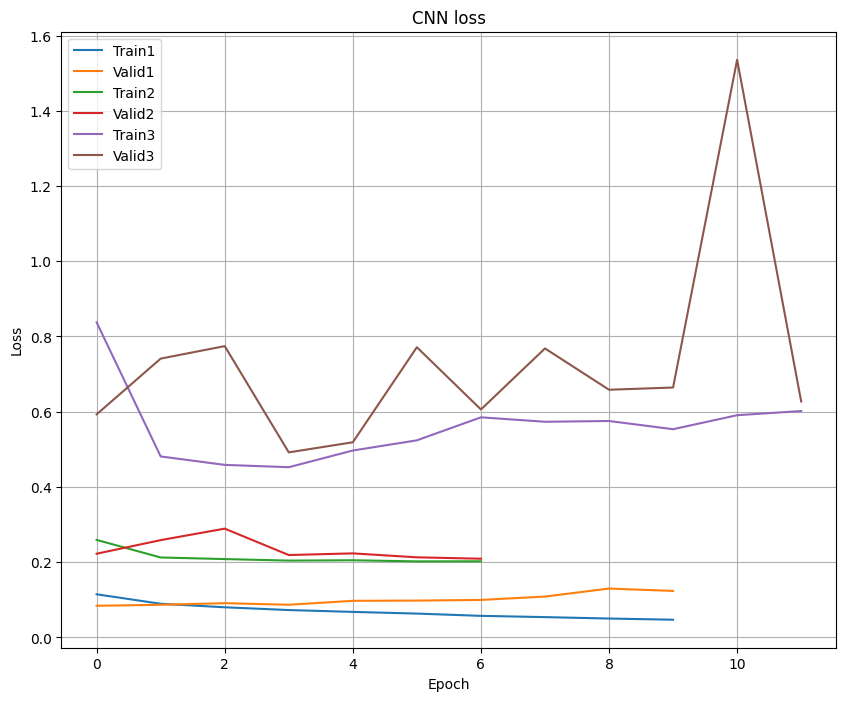

In [382]:
plt.figure(figsize=(10,8))
plt.semilogy(diz_ep1['train_loss_ep'], label='Train1')
plt.semilogy(diz_ep1['valid_loss_ep'], label='Valid1')
plt.semilogy(diz_ep2['train_loss_ep'], label='Train2')
plt.semilogy(diz_ep2['valid_loss_ep'], label='Valid2')
plt.semilogy(diz_ep3['train_loss_ep'], label='Train3')
plt.semilogy(diz_ep3['valid_loss_ep'], label='Valid3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('linear')
plt.grid()
plt.legend()
plt.title('CNN loss')
plt.show()


#### In this graph we can see that the least losses are obtained from the 1st model of CNN

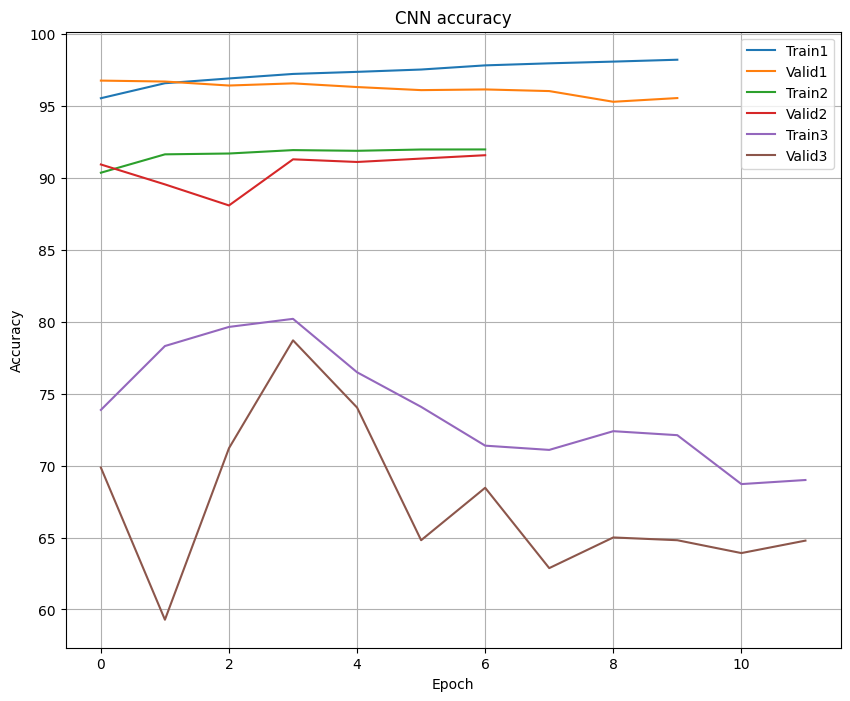

In [383]:
plt.figure(figsize=(10,8))
plt.semilogy(diz_ep1['train_acc_ep'], label='Train1')
plt.semilogy(diz_ep1['valid_acc_ep'], label='Valid1')
plt.semilogy(diz_ep2['train_acc_ep'], label='Train2')
plt.semilogy(diz_ep2['valid_acc_ep'], label='Valid2')
plt.semilogy(diz_ep3['train_acc_ep'], label='Train3')
plt.semilogy(diz_ep3['valid_acc_ep'], label='Valid3')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.yscale('linear')
plt.grid()
plt.legend()
plt.title('CNN accuracy')
plt.show()


#### So looking at the above graphs, it can be seen that we get the least losses and highest accuracies on 1st model. <br>
#### Now we train and evaluate the model3_1 on the real train and test sets using the same hyperparameters as model3_1.
#### Also at the 2nd epoch (epoch#1 in graph) we can see that the validation losses becomes greater than the training losses and the validation accuracies become lesser than the training accuracies, this is due to the model being trained again and again for 10 epochs across 5 folds. <br>
#### This can be solved by training the final model only on 10 epochs and removing the folds (since cross validation is not needed there anymore).

In [386]:
%%time

model3 = ConvNet().to(device)

optimizer = Adam(model3.parameters(), lr=0.001, weight_decay=0.0001)
loss_function = nn.BCEWithLogitsLoss()

num_epochs = 10

foldperf = {}

train_count = len(trainloader.dataset)
test_count = len(testloader.dataset)
best_accuracy = 0.0

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_metric1 = BinaryAccuracy(device=device)
train_metric2 = BinaryConfusionMatrix(device=device)
train_metric3 = BinaryPrecision(device=device)
train_metric4 = BinaryRecall(device=device)
train_metric5 = BinaryF1Score(device=device)

test_metric1 = BinaryAccuracy(device=device)
test_metric2 = BinaryConfusionMatrix(device=device)
test_metric3 = BinaryPrecision(device=device)
test_metric4 = BinaryRecall(device=device)
test_metric5 = BinaryF1Score(device=device)

model_3_train_true_labels = []
model_3_train_predicted_probs = []

model_3_test_true_labels = []
model_3_test_predicted_probs = []

for epoch in range(num_epochs):
    # Training on the training dataset
    model3.train()
    train_accuracy = 0.0
    train_loss = 0.0
    test_loss = 0.0

    history = {'train_loss': [], 'test_loss': [],'train_acc':[],'test_acc':[]}

    for i, (images, labels) in enumerate(trainloader):
        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())

        optimizer.zero_grad()
        outputs = model3(images)

        train_metric1.update(outputs.squeeze(),labels)
        train_metric2.update(outputs.squeeze(),labels)
        train_metric3.update(outputs.squeeze(),labels)
        train_metric4.update(outputs.squeeze(),labels)
        train_metric5.update(outputs.squeeze(),labels)

        loss = loss_function(outputs.squeeze(), labels.float())  # Squeeze the output and convert labels to float
        loss.backward()
        optimizer.step()

        train_loss += loss.cpu().data * images.size(0)
        predictions = torch.round(torch.sigmoid(outputs))  # Apply sigmoid activation and round to obtain binary predictions
        train_accuracy += int(torch.sum(predictions.squeeze() == labels.byte()))  # Convert predictions and labels to byte tensor

        #for roc curve
        model_3_train_predictions = torch.sigmoid(outputs).cpu().detach().numpy()  # Convert predictions to numpy array
        model_3_train_true_labels.extend(labels.cpu().numpy())  # Convert labels to numpy array and extend the true_labels list
        model_3_train_predicted_probs.extend(model_3_train_predictions)  # Extend the predicted_probs list with the predicted probabilities

    train_accuracy = train_accuracy / train_count
    train_loss = train_loss / train_count

    # Evaluation on the testing dataset
    model3.eval()
    test_accuracy = 0.0

    for i, (images, labels) in enumerate(testloader):
        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())

        outputs = model3(images)
        
        test_metric1.update(outputs.squeeze(),labels)
        test_metric2.update(outputs.squeeze(),labels)
        test_metric3.update(outputs.squeeze(),labels)
        test_metric4.update(outputs.squeeze(),labels)
        test_metric5.update(outputs.squeeze(),labels)

        test_loss += loss.cpu().data * images.size(0)
        predictions = torch.round(torch.sigmoid(outputs))
        test_accuracy += int(torch.sum(predictions.squeeze() == labels.byte()))

        #for roc curve
        model_3_test_predictions = torch.sigmoid(outputs).cpu().detach().numpy()  # Convert predictions to numpy array
        model_3_test_true_labels.extend(labels.cpu().numpy())  # Convert labels to numpy array and extend the true_labels list
        model_3_test_predicted_probs.extend(model_3_test_predictions)  # Extend the predicted_probs list with the predicted probabilities

    test_accuracy = test_accuracy / test_count
    test_loss = test_loss / test_count

    history['train_loss'].append(train_loss)
    history['test_loss'].append(test_loss)
    history['train_acc'].append(train_accuracy)
    history['test_acc'].append(test_accuracy)

    foldperf['epoch{}'.format(epoch+1)] = history

    print('Epoch: {:02d}    Train Loss: {:.2f}    Train Accuracy: {:.2f}%    Test Accuracy: {:.2f}%    Test Loss: {:.2f}'.format(epoch+1,
                                                                                                            train_loss,
                                                                                                            train_accuracy*100,
                                                                                                            test_accuracy*100,
                                                                                                            test_loss))

    metrics_3_train=[train_metric1.compute().item(), [[train_metric2.compute()[0][0].item(),train_metric2.compute()[0][1].item()],
                                                    [train_metric2.compute()[1][0].item(),train_metric2.compute()[1][1].item()]],
             train_metric3.compute().item(), train_metric4.compute().item(), train_metric5.compute().item()]
    metrics_3_test=[test_metric1.compute().item(), [[test_metric2.compute()[0][0].item(),test_metric2.compute()[0][1].item()],
                                                    [test_metric2.compute()[1][0].item(),test_metric2.compute()[1][1].item()]],
             test_metric3.compute().item(), test_metric4.compute().item(), test_metric5.compute().item()]

    # Save the best model
    if test_accuracy > best_accuracy:
        torch.save(model3.state_dict(), 'Saved Models/CNN_best.pt')
        best_accuracy = test_accuracy

Epoch: 01    Train Loss: 0.27    Train Accuracy: 89.26%    Test Accuracy: 90.69%    Test Loss: 0.13
Epoch: 02    Train Loss: 0.20    Train Accuracy: 92.07%    Test Accuracy: 90.70%    Test Loss: 0.14
Epoch: 03    Train Loss: 0.18    Train Accuracy: 92.92%    Test Accuracy: 92.90%    Test Loss: 0.06
Epoch: 04    Train Loss: 0.16    Train Accuracy: 93.64%    Test Accuracy: 93.22%    Test Loss: 0.03
Epoch: 05    Train Loss: 0.15    Train Accuracy: 94.24%    Test Accuracy: 93.32%    Test Loss: 0.06
Epoch: 06    Train Loss: 0.14    Train Accuracy: 94.81%    Test Accuracy: 93.02%    Test Loss: 0.11
Epoch: 07    Train Loss: 0.12    Train Accuracy: 95.28%    Test Accuracy: 93.76%    Test Loss: 0.14
Epoch: 08    Train Loss: 0.11    Train Accuracy: 95.55%    Test Accuracy: 93.52%    Test Loss: 0.03
Epoch: 09    Train Loss: 0.10    Train Accuracy: 96.09%    Test Accuracy: 93.70%    Test Loss: 0.08
Epoch: 10    Train Loss: 0.10    Train Accuracy: 96.27%    Test Accuracy: 93.48%    Test Loss: 0.16


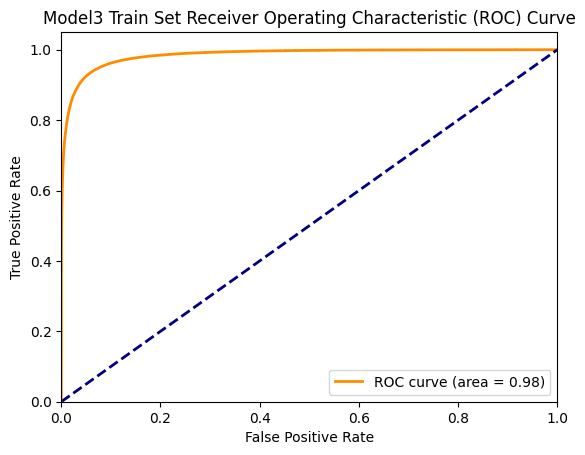

In [388]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(model_3_train_true_labels, model_3_train_predicted_probs)

# Calculate the Area Under the Curve (AUC)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model3 Train Set Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


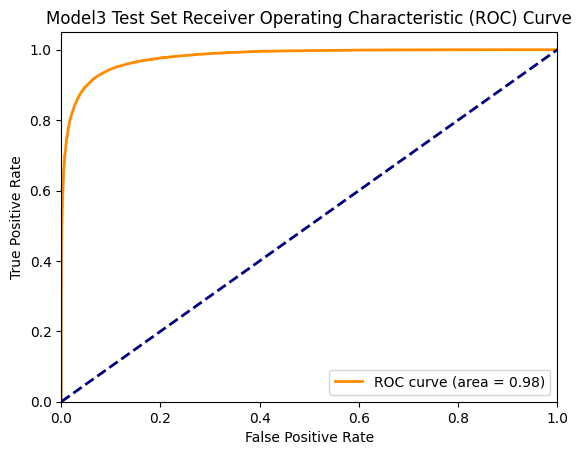

In [389]:
fpr, tpr, thresholds = roc_curve(model_3_test_true_labels, model_3_test_predicted_probs)

# Calculate the Area Under the Curve (AUC)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model3 Test Set Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [390]:
metrics_3_train = [metrics_3_train[0]] + metrics_3_train[2:] + [metrics_3_train[1]]
metrics_3_test = [metrics_3_test[0]] + metrics_3_test[2:] + [metrics_3_test[1]]

In [391]:
diz_ep = {'train_loss_ep':[],'test_loss_ep':[],'train_acc_ep':[],'test_acc_ep':[]}
for i in range(10): #num_epochs
      diz_ep['train_loss_ep'].append(np.float32(foldperf['epoch{}'.format(i+1)]['train_loss'])[0])
      diz_ep['test_loss_ep'].append(np.float32(foldperf['epoch{}'.format(i+1)]['test_loss'])[0])
      diz_ep['train_acc_ep'].append(np.float32(foldperf['epoch{}'.format(i+1)]['train_acc'])[0])
      diz_ep['test_acc_ep'].append(np.float32(foldperf['epoch{}'.format(i+1)]['test_acc'])[0])


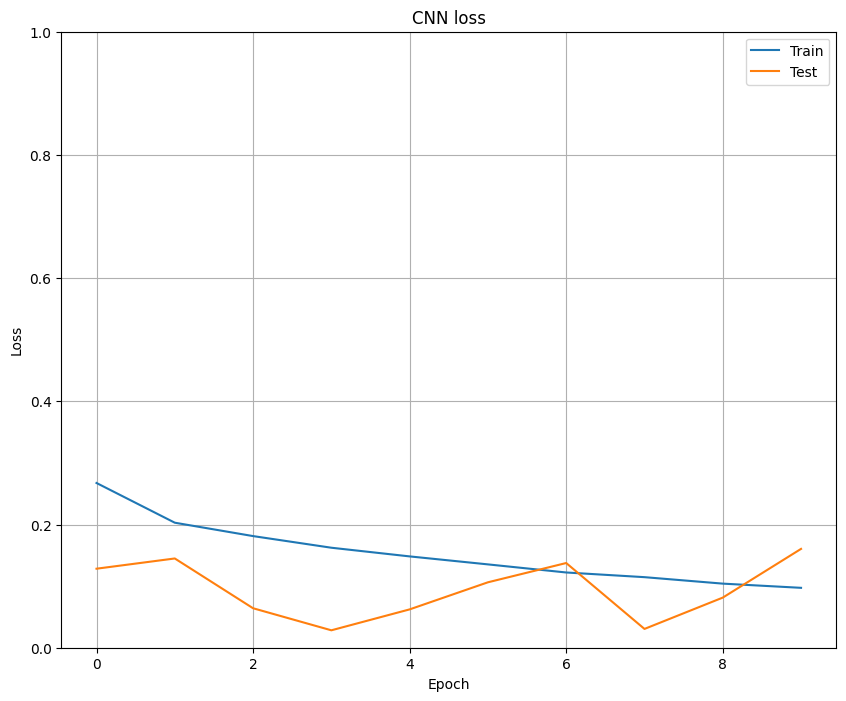

In [392]:
plt.figure(figsize=(10,8))
plt.semilogy(diz_ep['train_loss_ep'], label='Train')
plt.semilogy(diz_ep['test_loss_ep'], label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('linear')
ax=plt.gca()
ax.set_ylim([0, 1])
plt.grid()
plt.legend()
plt.title('CNN loss')
plt.show()


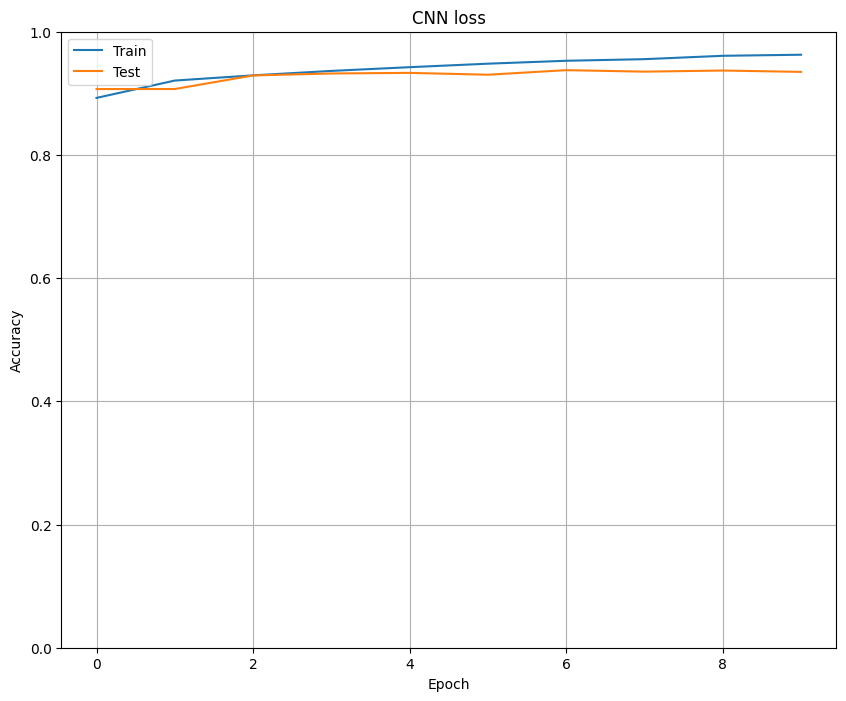

In [393]:
plt.figure(figsize=(10,8))
plt.semilogy(diz_ep['train_acc_ep'], label='Train')
plt.semilogy(diz_ep['test_acc_ep'], label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.yscale('linear')
ax=plt.gca()
ax.set_ylim([0, 1])
plt.grid()
plt.legend()
plt.title('CNN loss')
plt.show()


In [394]:
# Scaling confusion matrix to 50000 samples total by dividing with (number of epochs * folds)
if sum([sum(metrics_3_train[-1][0]),sum(metrics_3_train[-1][1])]) != 50000:
    for i in range(len(metrics_3_train[-1])):
        for j in range(len(metrics_3_train[-1][i])):
            metrics_3_train[-1][i][j] = round(metrics_3_train[-1][i][j]/10)
if sum([sum(metrics_3_test[-1][0]),sum(metrics_3_test[-1][1])]) != 10000:
    for i in range(len(metrics_3_test[-1])):
        for j in range(len(metrics_3_test[-1][i])):
            metrics_3_test[-1][i][j] = round(metrics_3_test[-1][i][j]/10)


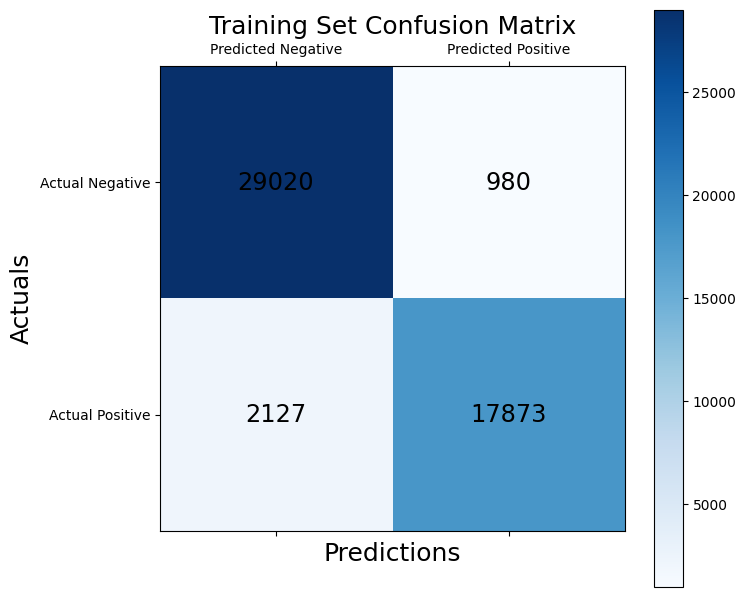

In [395]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(metrics_3_train[-1], cmap=plt.cm.Blues, alpha=0.3)
for i in range(len(metrics_3_train[-1])):
    for j in range(len(metrics_3_train[-1][0])):
        ax.text(x=j, y=i,s=metrics_3_train[-1][i][j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.imshow(metrics_3_train[-1], interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])
plt.title('Training Set Confusion Matrix', fontsize=18)
plt.show()


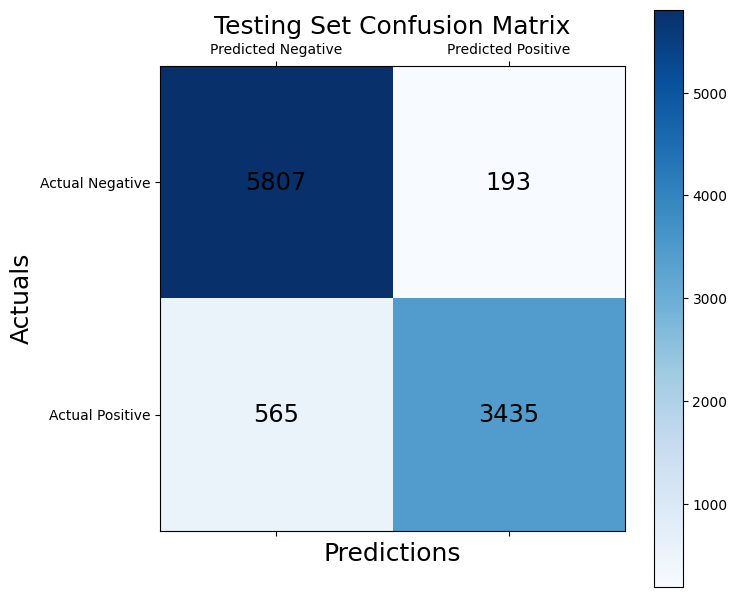

In [396]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(metrics_3_test[-1], cmap=plt.cm.Blues, alpha=0.3)
for i in range(len(metrics_3_test[-1])):
    for j in range(len(metrics_3_test[-1][0])):
        ax.text(x=j, y=i,s=metrics_3_test[-1][i][j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.imshow(metrics_3_test[-1], interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])
plt.title('Testing Set Confusion Matrix', fontsize=18)
plt.show()


## Comparing Metrics

Tabular Comparison

In [401]:
#Training Metrics of 9 models

train_metrics_comp = pd.DataFrame( [metrics_1_1_train, metrics_1_2_train, metrics_1_3_train,
                                    metrics_2_1_train, metrics_2_2_train, metrics_2_3_train,
                                    metrics_3_1_train, metrics_3_2_train, metrics_3_3_train],
                                   index = ["Logistic-1", "Logistic-2", "Logistic-3",
                                            "XGBoost-1", "XGBoost-2", "XGBoost-3",
                                            "ConvNN-1", "ConvNN-2", "ConvNN-3"],
                                   columns = ["Accuracy", "Precision", "Recall", "F1-score", "Confusion Matrix"]
                                   )

train_metrics_comp

,Accuracy,Precision,Recall,F1-score,Confusion Matrix
Logistic-1,0.840275,0.820285,0.769053,0.793843,"[[21310, 2695], [3694, 12301]]"
Logistic-2,0.840375,0.820504,0.769053,0.793946,"[[21314, 2691], [3694, 12301]]"
Logistic-3,0.840350,0.820364,0.769178,0.793947,"[[21311, 2694], [3692, 12303]]"
XGBoost-1,0.830700,0.778422,0.806064,0.792002,"[[20335, 3670], [3102, 12893]]"
XGBoost-2,0.843025,0.793251,0.821569,0.807162,"[[20580, 3425], [2854, 13141]]"
XGBoost-3,0.864075,0.813405,0.856580,0.834435,"[[20862, 3143], [2294, 13701]]"
ConvNN-1,0.972184,0.977550,0.952330,0.964775,"[[23650, 350], [763, 15237]]"
ConvNN-2,0.913161,0.929136,0.847543,0.886466,"[[22966, 1034], [2439, 13561]]"
ConvNN-3,0.729474,0.812228,0.421017,0.554572,"[[22443, 1557], [9264, 6736]]"


In [402]:
#Validation Metrics of 9 models

val_metrics_comp = pd.DataFrame( [metrics_1_1_val, metrics_1_2_val, metrics_1_3_val,
                                    metrics_2_1_val, metrics_2_2_val, metrics_2_3_val,
                                    metrics_3_1_val, metrics_3_2_val, metrics_3_3_val],
                                   index = ["Logistic-1", "Logistic-2", "Logistic-3",
                                            "XGBoost-1", "XGBoost-2", "XGBoost-3",
                                            "ConvNN-1", "ConvNN-2", "ConvNN-3"],
                                   columns = ["Accuracy", "Precision", "Recall", "F1-score", "Confusion Matrix"] )

val_metrics_comp

,Accuracy,Precision,Recall,F1-score,Confusion Matrix
Logistic-1,0.812800,0.785695,0.732335,0.758077,"[[5195, 800], [1072, 2933]]"
Logistic-2,0.812900,0.785753,0.732584,0.758237,"[[5195, 800], [1071, 2934]]"
Logistic-3,0.812600,0.785427,0.732085,0.757819,"[[5194, 801], [1073, 2932]]"
XGBoost-1,0.809100,0.754369,0.776030,0.765046,"[[4983, 1012], [897, 3108]]"
XGBoost-2,0.798600,0.737646,0.771536,0.754210,"[[4896, 1099], [915, 3090]]"
XGBoost-3,0.845500,0.793977,0.829463,0.811332,"[[5133, 862], [683, 3322]]"
ConvNN-1,0.960808,0.965761,0.935175,0.950222,"[[5867, 133], [259, 3741]]"
ConvNN-2,0.905960,0.904312,0.855414,0.879184,"[[5638, 362], [578, 3422]]"
ConvNN-3,0.667355,0.695771,0.299225,0.418478,"[[5477, 523], [2803, 1197]]"


In [399]:
#Training Metrics of best models of 3 algorithms

train_metrics_best = pd.DataFrame( [metrics_1_train, metrics_2_train, metrics_3_train],
                                  index = ["Logistics", "XGBoost", "ConvNN"],
                                  columns = ["Accuracy", "Precision", "Recall", "F1-score", "Confusion Matrix"] )

train_metrics_best

,Accuracy,Precision,Recall,F1-score,Confusion Matrix
Logistics,0.836380,0.815965,0.763050,0.788621,"[[26558, 3442], [4739, 15261]]"
XGBoost,0.862780,0.812046,0.854800,0.832875,"[[26043, 3957], [2904, 17096]]"
ConvNN,0.937846,0.947998,0.893635,0.920014,"[[29020, 980], [2127, 17873]]"


In [400]:
#Testing Metrics of best models of 3 algorithms

test_metrics_best = pd.DataFrame( [metrics_1_test, metrics_2_test, metrics_3_test],
                                  index = ["Logistics", "XGBoost", "ConvNN"],
                                  columns = ["Accuracy", "Precision", "Recall", "F1-score", "Confusion Matrix"] )

test_metrics_best

,Accuracy,Precision,Recall,F1-score,Confusion Matrix
Logistics,0.81660,0.791599,0.73500,0.762250,"[[5226, 774], [1060, 2940]]"
XGBoost,0.81660,0.791599,0.73500,0.762250,"[[5226, 774], [1060, 2940]]"
ConvNN,0.92412,0.946692,0.85865,0.900524,"[[5807, 193], [565, 3435]]"


## Best Model among all is?

After comparing the models, Now we can say that the best one among all the models is the best of <b>Convolutional Neural Network<b>

# INTERFACE

In [1]:
#________________imports________________

import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import joblib
import torch
import torchvision.transforms as transforms
import torch.nn as nn
from torch.autograd import Variable


#________________Functions________________

# converting image array into CIFAR-10 data format
# as the models have been trained in the form of CIFAR-10 data
def data_from_image_array(image_array):
    red, green, blue = [], [], []
    for i in image_array:
        for j in i:
            red.append(j[0])
            green.append(j[1])
            blue.append(j[2])
    return np.array(red+green+blue)

#prediction function for Logistics & XGB
def prediction(model, image):
    image_array = np.asarray(image)

    image_data = data_from_image_array(image_array)
    image_data_normalized = image_data / 255

    prediction = model.predict(np.array([image_data_normalized]))
    if prediction == 0: return 'animal'
    elif prediction==1: return 'vehicle'
    else: return None

#prediction function
def cnn_prediction(model, image):

    transformer = transforms.Compose(
     [transforms.Resize((32,32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    image_tensor = transformer(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    image_tensor.to(device)
    input = Variable(image_tensor)
    input = input.to(device)
    output = model(input)
    label_index = output.data.cpu().numpy()
    pred = 'vehicle' if label_index.item() >= 0 else 'animal'
    return pred

#Convlolutional Neural Network class
class ConvNet(nn.Module):
    def __init__(self, conv_kernel_size=3, pool_kernel_size=2, stride=1, padding=1):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=conv_kernel_size, stride=stride, padding=padding)
        self.bn1 = nn.BatchNorm2d(num_features=12)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=pool_kernel_size)

        self.conv2 = nn.Conv2d(in_channels=12, out_channels=20, kernel_size=conv_kernel_size, stride=stride, padding=padding)
        self.relu2 = nn.ReLU()

        self.conv3 = nn.Conv2d(in_channels=20, out_channels=32, kernel_size=conv_kernel_size, stride=stride, padding=padding)
        self.bn3 = nn.BatchNorm2d(num_features=32)
        self.relu3 = nn.ReLU()

        self.fc = nn.Linear(in_features=32 * 16 * 16, out_features=1)

    def forward(self, input):
        output = self.conv1(input)
        output = self.bn1(output)
        output = self.relu1(output)
        output = self.pool(output)

        output = self.conv2(output)
        output = self.relu2(output)

        output = self.conv3(output)
        output = self.bn3(output)
        output = self.relu3(output)

        output = output.view(-1, 32 * 16 * 16)
        output = self.fc(output)

        return output

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [3]:
#________________Loading Models________________

model1_1 = joblib.load("Saved Models/model1_1.sav")
model1_2 = joblib.load("Saved Models/model1_2.sav")
model1_3 = joblib.load("Saved Models/model1_3.sav")
model1 = joblib.load("Saved Models/model1.sav")

model2_1 = joblib.load("Saved Models/model2_1.sav")
model2_2 = joblib.load("Saved Models/model2_2.sav")
model2_3 = joblib.load("Saved Models/model2_3.sav")
model2 = joblib.load("Saved Models/model2.sav")

checkpoint1=torch.load('Saved Models/model3_1.pt', map_location=device)
model3_1=ConvNet(conv_kernel_size=3, pool_kernel_size=2, stride=1, padding=1)
model3_1.load_state_dict(checkpoint1)
model3_1.to(device)
model3_1.eval()

checkpoint2=torch.load('Saved Models/model3_2.pt', map_location=device)
model3_2=ConvNet(conv_kernel_size=5, pool_kernel_size=2, stride=1, padding=2)
model3_2.load_state_dict(checkpoint2)
model3_2.to(device)
model3_2.eval()

checkpoint3=torch.load('Saved Models/model3_3.pt', map_location=device)
model3_3=ConvNet(conv_kernel_size=7, pool_kernel_size=2, stride=1, padding=3)
model3_3.load_state_dict(checkpoint3)
model3_3.to(device)
model3_3.eval()

checkpoint=torch.load('Saved Models/CNN_best.pt', map_location=device)
model3=ConvNet()
model3.load_state_dict(checkpoint)
model3.to(device)
model3.eval()

models = np.array([[model1_1, model1_2, model1_3, model1],
                   [model2_1, model2_2, model2_3, model2],
                   [model3_1, model3_2, model3_3, model3] ] )

In [4]:
#________________Loading Image________________
def load_image(image_path):
    try:
        img_large = Image.open(image_path)
    except FileNotFoundError:
        print("Either Path is incorrect or you entered the filename incorrectly")
        return None, None
    except PermissionError:
        print("Entered path is not for an image")
        return None, None
    
    img = img_large.resize((32,32))
    img = img.convert('RGB')
    
    return img_large, img

In [5]:
#________________Simple Interface________________

def interface(image_path, models):
    
    img_large, img = load_image(image_path)
    
    if img_large==None or img==None:
        return

    while True:
        print("""Select a model through which you want to predct
        1. Logistics Regression
        2. Extreme Gradient Boosting
        3. Convolutional Neural Network
        4. Best of 3 Models
        5. Exit""")

        try:
            i = int(input("Your Selection? "))
        except:
            print("Please enter the values in integer in between 1 to 5")
            continue

        if i not in (1,2,3,4,5): continue
        if i==4:
            print("*"*20 + "Prediction:\t" + cnn_prediction(models[2][3], img) + "*"*20)
            plt.imshow(img_large)
            plt.axis("off")
            return
        elif i==5: break

        while True:
            print("""Select the model number
            1. Model 1
            2. Model 2
            3. Model 3
            4. Best of these 3 models
            5. Back""")

            try:
                j = int(input("Your Selection? "))
            except:
                print("Please enter values in integer in range 1 to 5")
                continue
            

            if j not in (1,2,3,4,5): continue

            if j==5: break

            elif j==1 and i==1: print("*"*20 + "Prediction:\t" + prediction(models[0][0], img) + "*"*20)
            elif j==2 and i==1: print("*"*20 + "Prediction:\t" + prediction(models[0][1], img) + "*"*20)
            elif j==3 and i==1: print("*"*20 + "Prediction:\t" + prediction(models[0][2], img) + "*"*20)
            elif j==4 and i==1: print("*"*20 + "Prediction:\t" + prediction(models[0][3], img) + "*"*20)

            elif j==1 and i==2: print("*"*20 + "Prediction:\t" + prediction(models[1][0], img) + "*"*20)
            elif j==2 and i==2: print("*"*20 + "Prediction:\t" + prediction(models[1][1], img) + "*"*20)
            elif j==3 and i==2: print("*"*20 + "Prediction:\t" + prediction(models[1][2], img) + "*"*20)
            elif j==4 and i==2: print("*"*20 + "Prediction:\t" + prediction(models[1][3], img) + "*"*20)

            elif j==1 and i==3: print("*"*20 + "Prediction:\t" + cnn_prediction(models[2][0], img) + "*"*20)
            elif j==2 and i==3: print("*"*20 + "Prediction:\t" + cnn_prediction(models[2][1], img) + "*"*20)
            elif j==3 and i==3: print("*"*20 + "Prediction:\t" + cnn_prediction(models[2][2], img) + "*"*20)
            elif j==4 and i==3: print("*"*20 + "Prediction:\t" + cnn_prediction(models[2][3], img) + "*"*20)
            plt.imshow(img_large)
            plt.axis("off")
            return

In [6]:
#________________Compare models________________

def comparative_interface(image_path, models):
    
    img_large, img = load_image(image_path)
    
    if img_large==None or img==None:
        return
    
    
    dataframe = pd.DataFrame({'Linear Regression' : [prediction(m, img) for m in models[0]],
                              'XGBoost' : [prediction(m, img) for m in models[1]],
                              'Convolutional Neural Network' : [cnn_prediction(m, img) for m in models[2]] },
                            index = ["Model 1", "Model 2", "Model 3", "Best of 3"])
    
    plt.imshow(img_large), plt.axis("off")
    
    return dataframe
    

Enter the path of an image with extension: Downloaded Images for Testing/1.jpg
Select a model through which you want to predct
        1. Logistics Regression
        2. Extreme Gradient Boosting
        3. Convolutional Neural Network
        4. Best of 3 Models
        5. Exit
Your Selection? 3
Select the model number
            1. Model 1
            2. Model 2
            3. Model 3
            4. Best of these 3 models
            5. Back
Your Selection? 4
********************Prediction:	animal********************


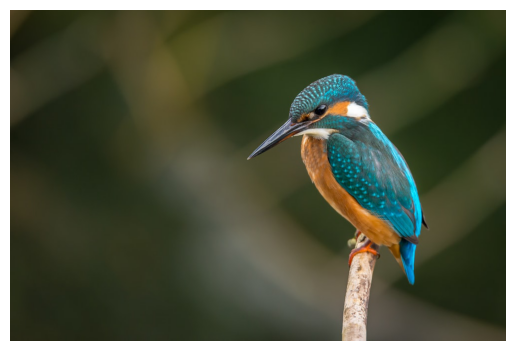

In [7]:
# image_path = "Downloaded Images for Testing/1.jpg"

image_path = input("Enter the path of an image with extension: ")

interface(image_path, models)

Enter the path of an image with extension: Downloaded Images for Testing/16.webp


,Linear Regression,XGBoost,Convolutional Neural Network
Model 1,vehicle,vehicle,vehicle
Model 2,vehicle,vehicle,vehicle
Model 3,vehicle,vehicle,vehicle
Best of 3,vehicle,vehicle,vehicle


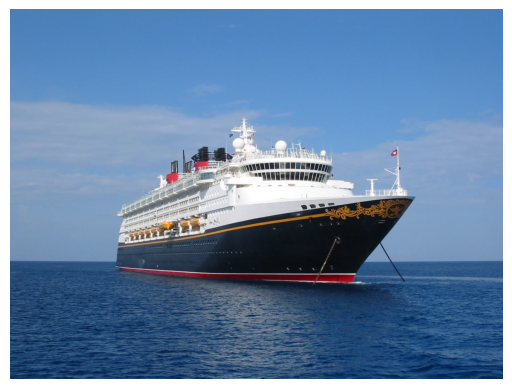

In [8]:
# image_path = "Downloaded Images for Testing/16.webp"

image_path = input("Enter the path of an image with extension: ")

comparative_interface(image_path, models)